# EDA of Car Sales Data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# I have inserted the link to the original dataset. Input directory from PC
df = pd.read_csv(https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data)
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  car_condition  odometer  color interior  \
0  5xyktca69fg566472    ca            5.0   16639.0  white    black   
1  5xyktca69fg561319    ca            5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca           45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca           41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca           43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice    saledate  
0                 kia motors america  inc  20500.0       21500.0  2014-12-16  
1                 kia motors america  inc  20800.0       21500.0  2014-12-16  
2  financial services remarketing (lease)  31900.0       30000.0  2015-01-15  
3                 volvo na rep/world omni  27500.0       27750.0  2015-01-29  
4  financial services remarketing (lease)  66000.0       67000.0  2014-12-18

# Overview of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           558837 non-null  int64  
 1   make           548536 non-null  object 
 2   model          548438 non-null  object 
 3   trim           548186 non-null  object 
 4   body           545642 non-null  object 
 5   transmission   493485 non-null  object 
 6   vin            558833 non-null  object 
 7   state          558837 non-null  object 
 8   car_condition  547017 non-null  float64
 9   odometer       558743 non-null  float64
 10  color          558088 non-null  object 
 11  interior       558088 non-null  object 
 12  seller         558837 non-null  object 
 13  mmr            558799 non-null  float64
 14  sellingprice   558825 non-null  float64
 15  saledate       558837 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
df.describe()

year  car_condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000

In [8]:
df.shape

(558837, 16)

## Overview of Missing Values 

<Axes: >

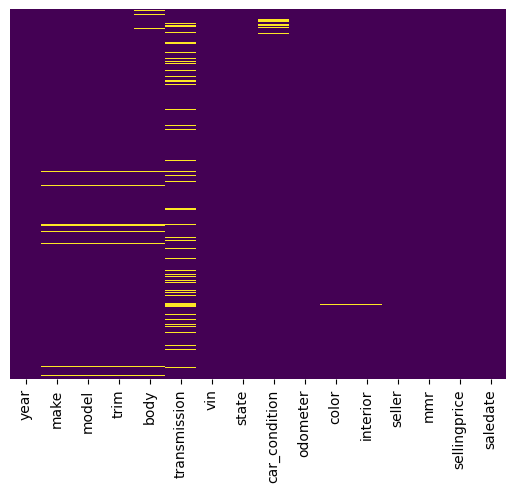

In [10]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### Count of number of missing value by each columns. 
After looking at the heat map, we can tell there are missing values so we count them to see how many there are.

In [12]:
missing_values = df[['make', 'model', 'trim', 'body','transmission','state','color','interior','car_condition']].isna().sum()
print(missing_values)

make             10301
model            10399
trim             10651
body             13195
transmission     65352
state                0
color              749
interior           749
car_condition    11820
dtype: int64


In [13]:
# with at least one row with missing value
missing_data = df[df.isna().any(axis = 1)]
missing_data.shape

(86512, 16)

### Check percentage
There's not much we can do with the count of missing data. Checking the percentage should maybe give better insight

In [15]:
percentage_missing = missing_data.shape[0]/df.shape[0]
print(f'{percentage_missing:.2f}')

0.15


15% of the data is missing

## Remove missing values (Not all)

It's unfortunate that we have to remove parts of out data but this is ultimately part of the process. Making sure that out data is properly cleaned means that we can carry out data analysis properly. Drop all the null values except for transmission column.  

<Axes: >

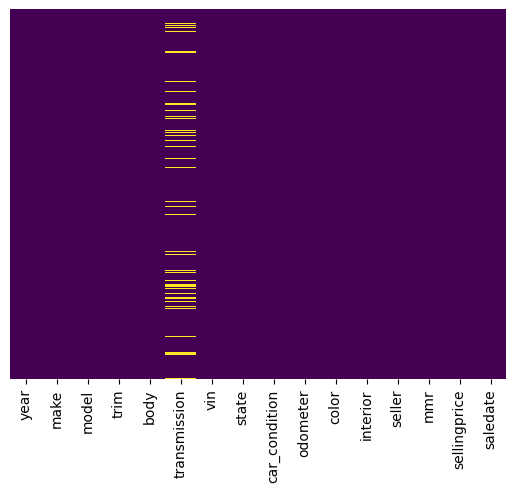

In [19]:
df.dropna(subset = ['make', 'model', 'trim', 'body', 'state', 'color', 'interior', 'car_condition'], inplace = True)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [20]:
transmission_count = df['transmission'].value_counts()
transmission_count_df = pd.DataFrame(transmission_count.reset_index())
transmission_count_df.columns = ['transmission', 'count']
total_count= transmission_count_df['count'].sum()
automatic_count = transmission_count_df.loc[transmission_count_df['transmission'] == 'automatic', 'count'].values[0]
manual_count = transmission_count_df.loc[transmission_count_df['transmission'] == 'manual', 'count'].values[0]
automatic_percentage = automatic_count/total_count * 100 
manual_percentage = manual_count/total_count * 100 
print(total_count)
print(f'The percentage of automatic vehicles is:  {automatic_percentage: .2f}')
print(f'The percentage of manual vehicles is:  {manual_percentage: .2f}')

472357
The percentage of automatic vehicles is:   96.54
The percentage of manual vehicles is:   3.46


In [21]:
total_missing = df.transmission.isna().sum()
total_missing

61328

## Filling in missing values with same proportion. 

In [23]:
missing_transmission = df['transmission'].isnull()
num_automatic = int(total_missing * 0.96)
num_manual = total_missing - num_automatic
choices = np.random.choice(['automatic', 'manual'], size = total_missing, p = [0.96, 0.04])
df.loc[missing_transmission, 'transmission'] = choices
print(df['transmission'].isnull().sum())

0


## Making sure there is no more missing data

<Axes: >

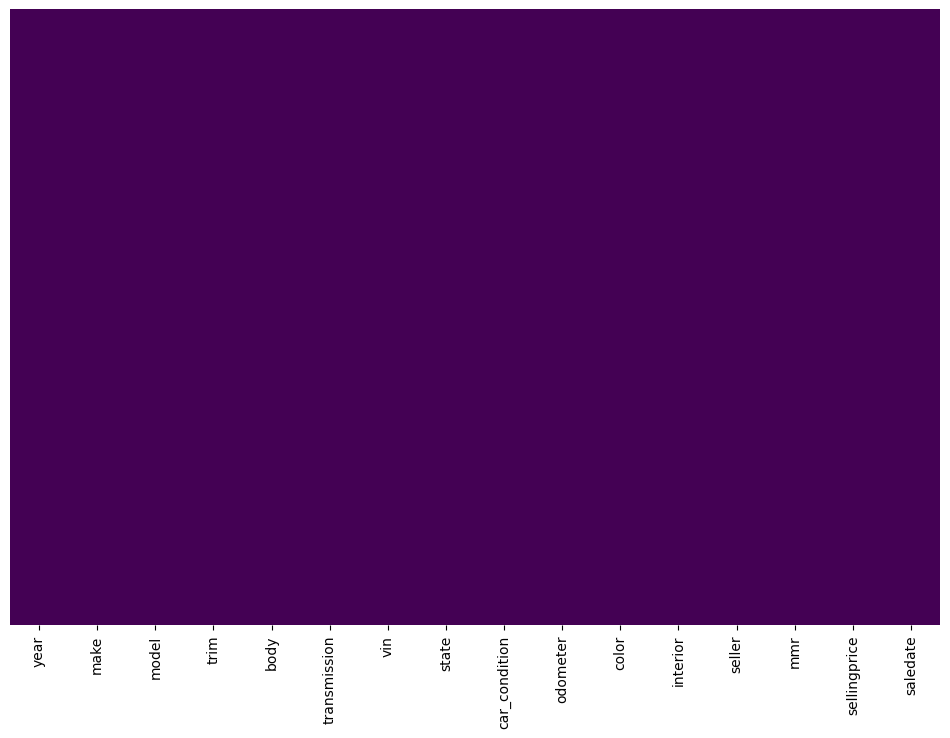

In [25]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis", cbar = False)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533685 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           533685 non-null  int64  
 1   make           533685 non-null  object 
 2   model          533685 non-null  object 
 3   trim           533685 non-null  object 
 4   body           533685 non-null  object 
 5   transmission   533685 non-null  object 
 6   vin            533685 non-null  object 
 7   state          533685 non-null  object 
 8   car_condition  533685 non-null  float64
 9   odometer       533660 non-null  float64
 10  color          533685 non-null  object 
 11  interior       533685 non-null  object 
 12  seller         533685 non-null  object 
 13  mmr            533673 non-null  float64
 14  sellingprice   533673 non-null  float64
 15  saledate       533685 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 69.2+ MB


# Beginning of EDA
# Top 10 Brands by Total Sales

In [28]:
sales_by_make = df.groupby('make')['sellingprice'].sum().sort_values(ascending=False).head(10)
sales_by_make

make
Ford             1.347655e+09
Chevrolet        7.115156e+08
Nissan           6.278337e+08
Toyota           4.820166e+08
BMW              4.306476e+08
Mercedes-Benz    3.600648e+08
Dodge            3.403129e+08
Infiniti         3.112317e+08
Honda            2.928577e+08
Lexus            2.384251e+08
Name: sellingprice, dtype: float64

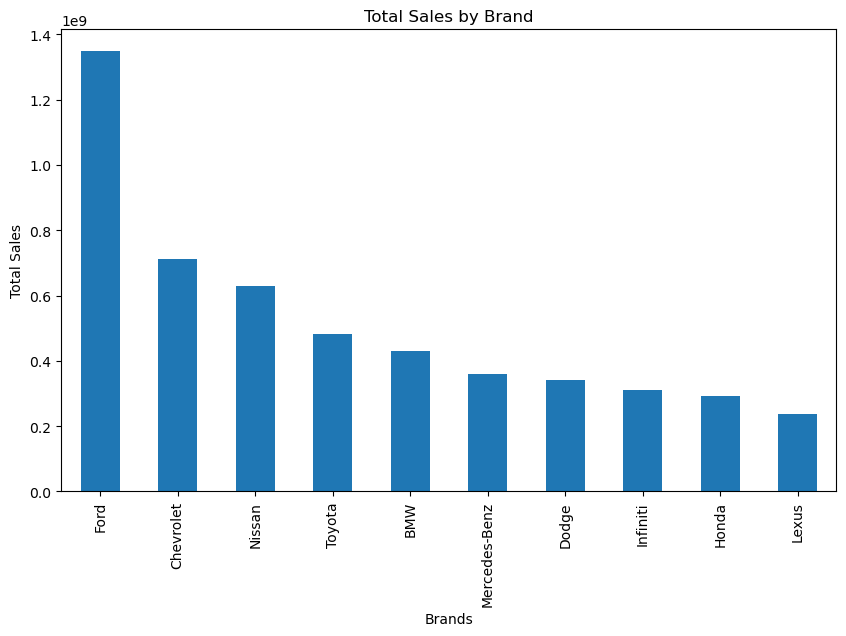

In [29]:
plt.figure(figsize=(10, 6))
sales_by_make.plot(kind='bar')
plt.title('Total Sales by Brand')
plt.xlabel('Brands')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Most Expensive Car Brands

In [31]:
avg_price_by_make = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(10)
avg_price_by_make

make
Rolls-Royce     153456.250000
Ferrari         127210.526316
Lamborghini     112625.000000
Bentley          74349.130435
Tesla            67054.347826
Aston Martin     54812.000000
Fisker           46461.111111
Maserati         45632.442748
Lotus            40800.000000
Porsche          40348.898604
Name: sellingprice, dtype: float64

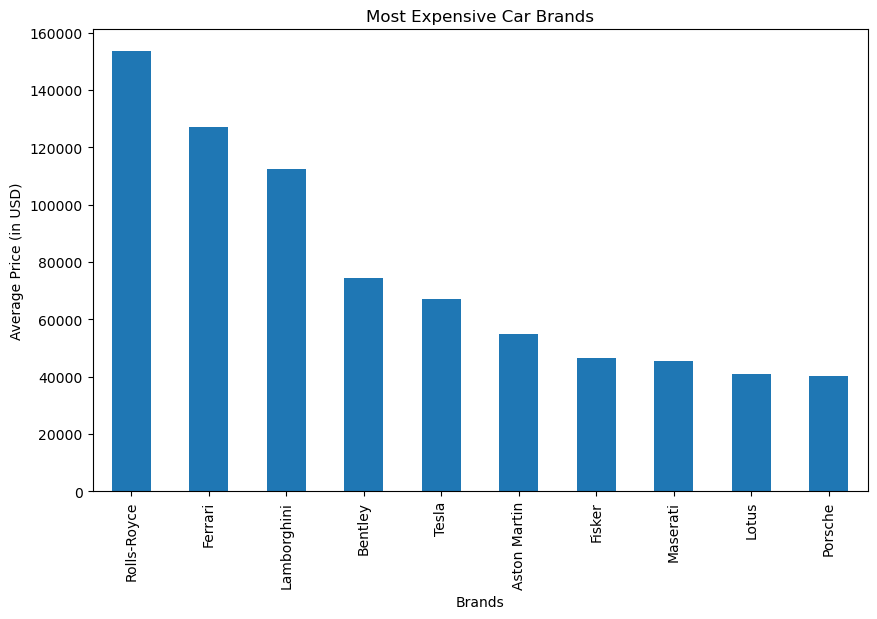

In [32]:
plt.figure(figsize=(10, 6))
avg_price_by_make.plot(kind='bar')
plt.title('Most Expensive Car Brands')
plt.xlabel('Brands')
plt.ylabel('Average Price (in USD)')
plt.xticks(rotation=90)
plt.show()

# Distribution of Selling Price by Car Brands

In [34]:
top_makes = df['make'].value_counts().head(10).index
filtered_data = df[df['make'].isin(top_makes)]

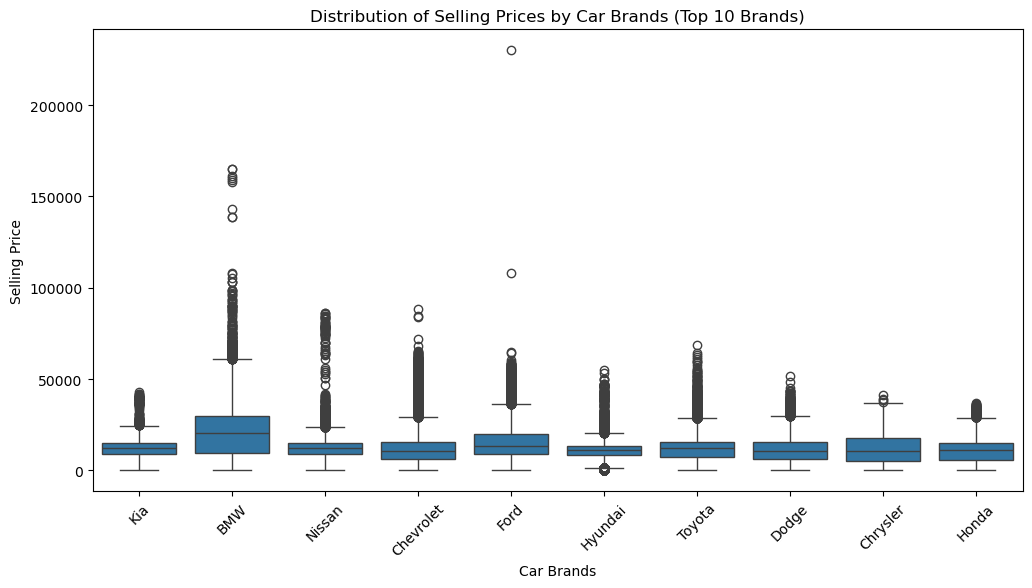

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x='make', y='sellingprice', data=filtered_data)
plt.title('Distribution of Selling Prices by Car Brands (Top 10 Brands)')
plt.xlabel('Car Brands')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

# Analysis of High-End vs. Low-End Vehicles

In [37]:
median_mmr = df['mmr'].median()
median_mmr = df['vehicle_type'] = df['mmr'].apply(lambda x: 'High-End' if x > median_mmr else 'Low-End')
median_mmr

0         High-End
1         High-End
2         High-End
3         High-End
4         High-End
            ...   
558832    High-End
558833    High-End
558834    High-End
558835    High-End
558836    High-End
Name: mmr, Length: 533685, dtype: object

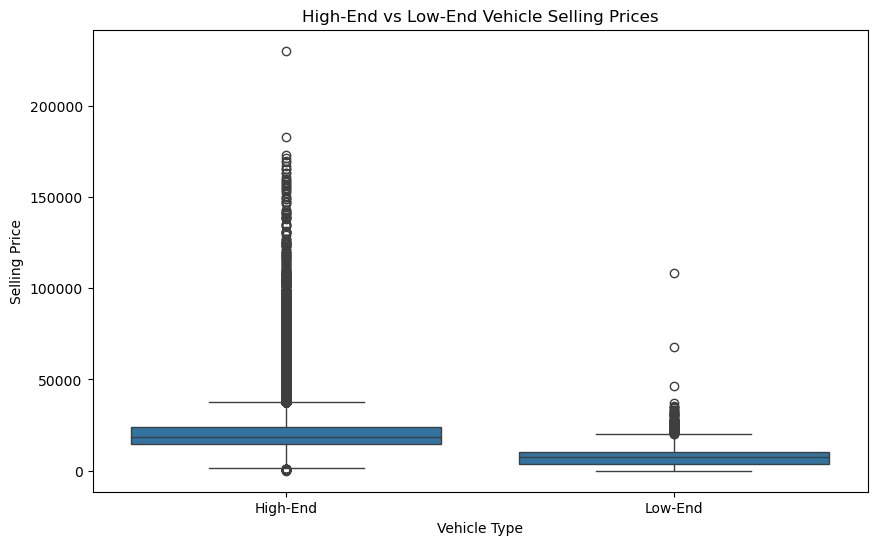

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='vehicle_type', y='sellingprice', data=df)
plt.title('High-End vs Low-End Vehicle Selling Prices')
plt.xlabel('Vehicle Type')
plt.ylabel('Selling Price')
plt.show()

# Distribution of Selling Price

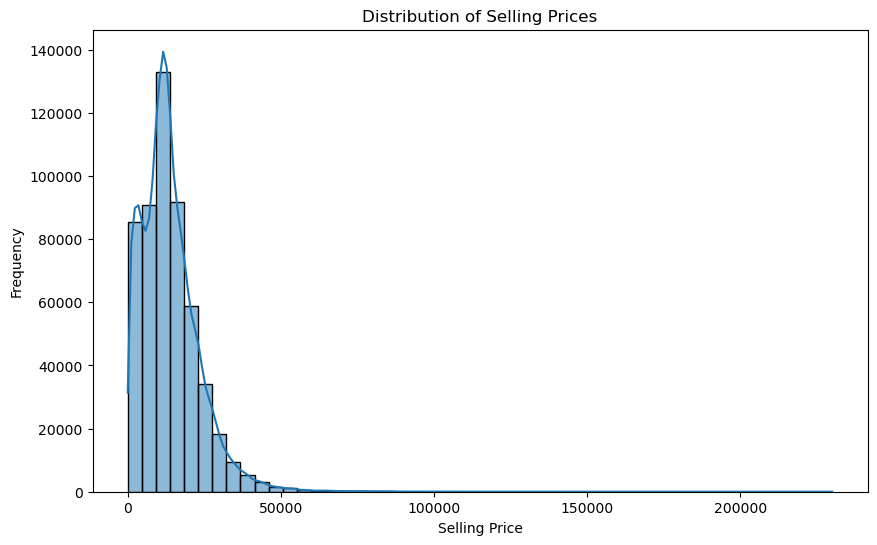

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df['sellingprice'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Relationship Between Car Condition and Selling Price

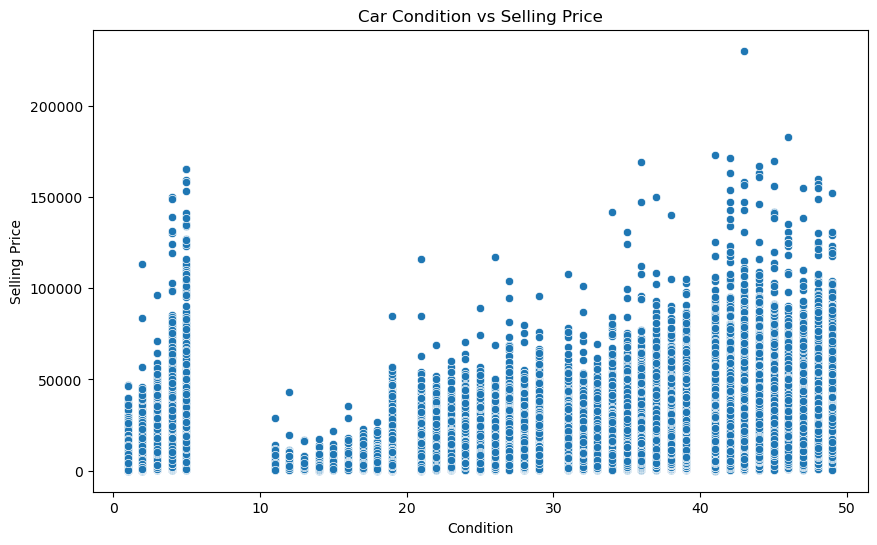

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='car_condition', y='sellingprice', data=df)
plt.title('Car Condition vs Selling Price')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()

# Sales Over Time

In [81]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
df = df.dropna(subset=['saledate'])
sales_over_time = df.groupby(df['saledate'].dt.to_period('M'))['sellingprice'].sum()
sales_over_time

saledate
2014-01    3.181725e+06
2014-02    1.050000e+04
2014-12    5.166187e+08
2015-01    1.835908e+09
2015-02    2.179530e+09
2015-03    6.120187e+08
2015-04    1.456650e+07
2015-05    7.386935e+08
2015-06    1.474287e+09
2015-07    2.176371e+07
Freq: M, Name: sellingprice, dtype: float64

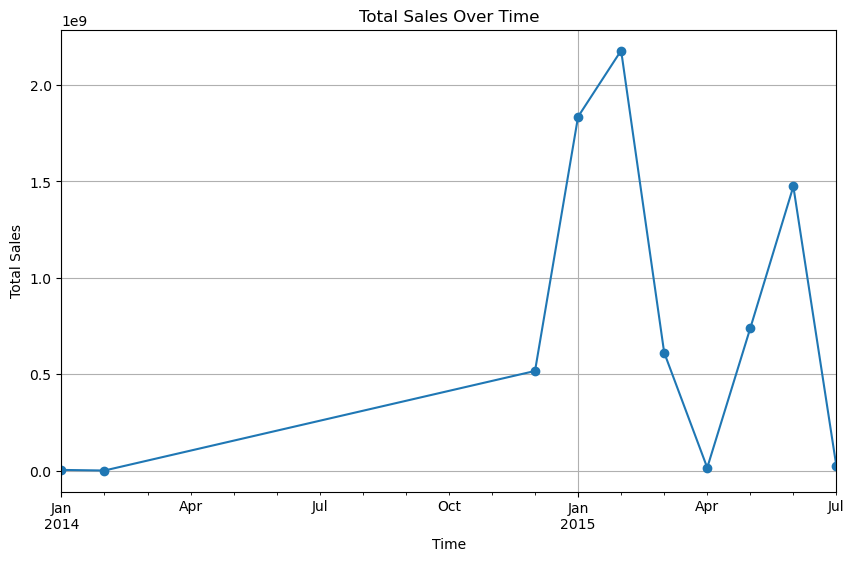

In [83]:
plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Top Sales by year

In [86]:
top_sales_by_year = df.groupby('year')['sellingprice'].max().reset_index()
top_sales_by_year

year  sellingprice
0   1990       11500.0
1   1991        6750.0
2   1992       13700.0
3   1993        4350.0
4   1994        9800.0
5   1995       13600.0
6   1996       12500.0
7   1997       10900.0
8   1998       17100.0
9   1999       18100.0
10  2000       25400.0
11  2001       45750.0
12  2002       38100.0
13  2003       29600.0
14  2004       81000.0
15  2005      109000.0
16  2006       66500.0
17  2007      117500.0
18  2008      117000.0
19  2009       96000.0
20  2010      149800.0
21  2011      183000.0
22  2012      169500.0
23  2013      171500.0
24  2014      230000.0
25  2015      173000.0

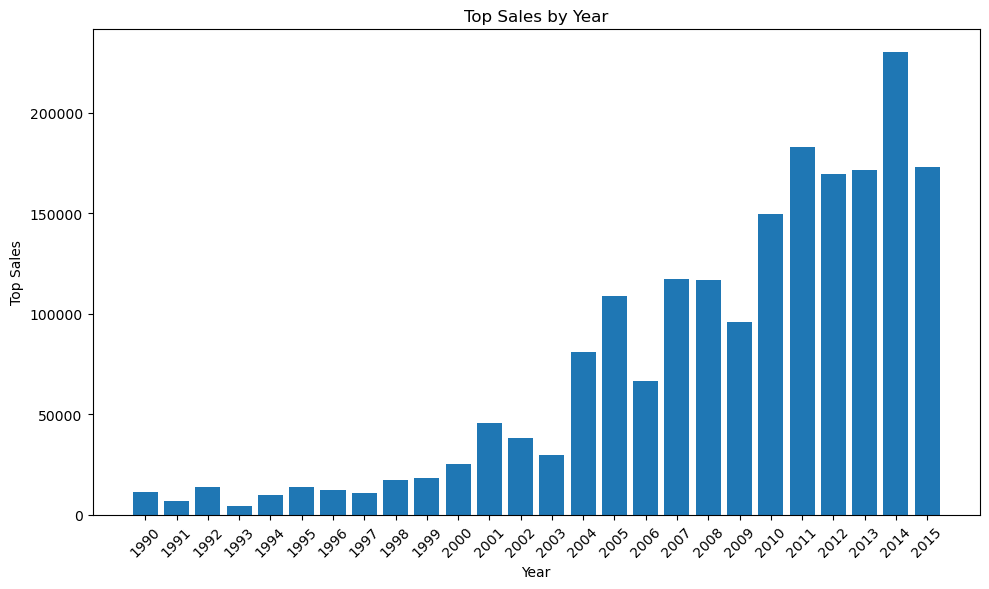

In [341]:
plt.figure(figsize=(10, 6))
plt.bar(top_sales_by_year['year'], top_sales_by_year['sellingprice'])
plt.xticks(top_sales_by_year['year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Top Sales')
plt.title('Top Sales by Year')
plt.tight_layout()
plt.show()

# Average Sales by Year

In [344]:
avg_price_by_year = df.groupby('year')['sellingprice'].mean().sort_values(ascending=False)
avg_price_by_year

year
2015    26047.274123
2014    20040.307284
2013    17466.213158
2012    16590.671477
2011    15876.753101
2010    12479.671906
2009    10478.056603
2008     9575.711807
2007     7980.462494
2006     6052.607778
2005     4907.457681
2004     4294.453360
2003     3374.556957
2002     2657.821021
2001     2153.095725
2000     1770.543367
1999     1499.073933
1990     1317.500000
1998     1248.945009
1997     1067.854167
1991      980.263158
1996      898.780488
1992      855.630631
1995      849.564685
1994      831.481481
1993      718.225806
Name: sellingprice, dtype: float64

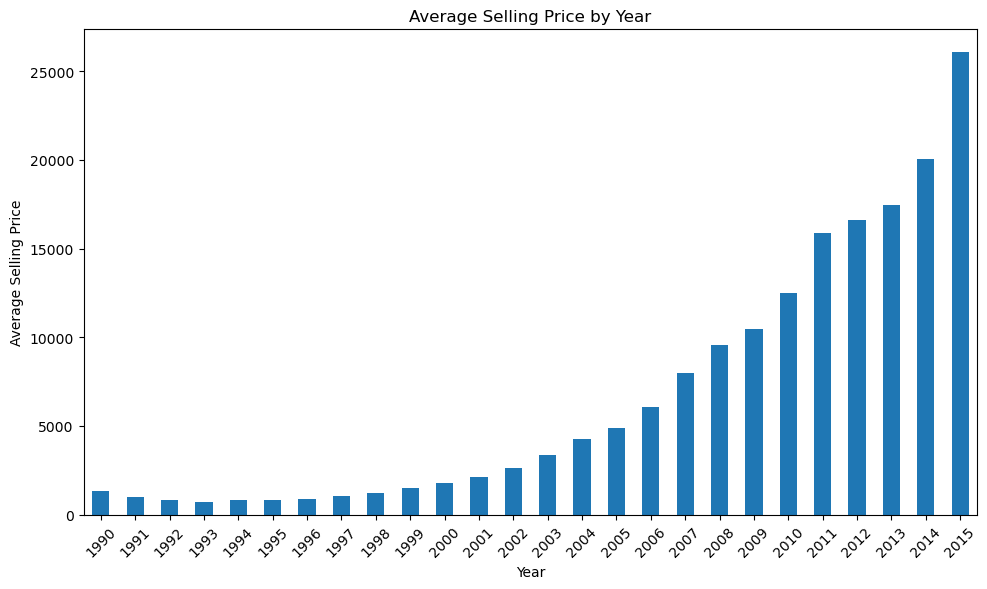

In [350]:
avg_price_by_year = df.groupby('year')['sellingprice'].mean()
plt.figure(figsize=(10, 6))
avg_price_by_year.plot(kind='bar')
plt.xticks(range(len(avg_price_by_year.index)), avg_price_by_year.index, rotation=45)
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.tight_layout()
plt.show()

# Seasonal Trends in Car Sales

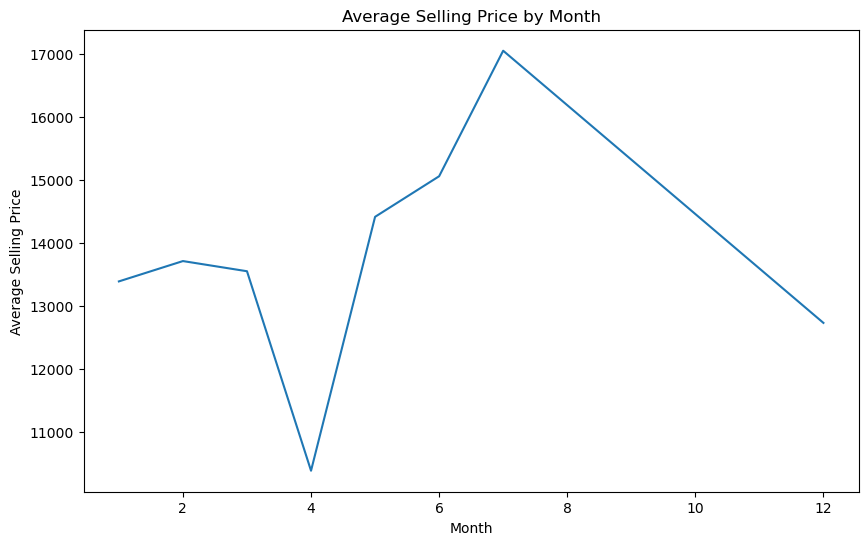

In [152]:
df['month'] = df['saledate'].dt.month
monthly_sales = df.groupby('month')['sellingprice'].mean()
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line')
plt.title('Average Selling Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Selling Price')
plt.show()

# Impact of Mileage on Selling Price

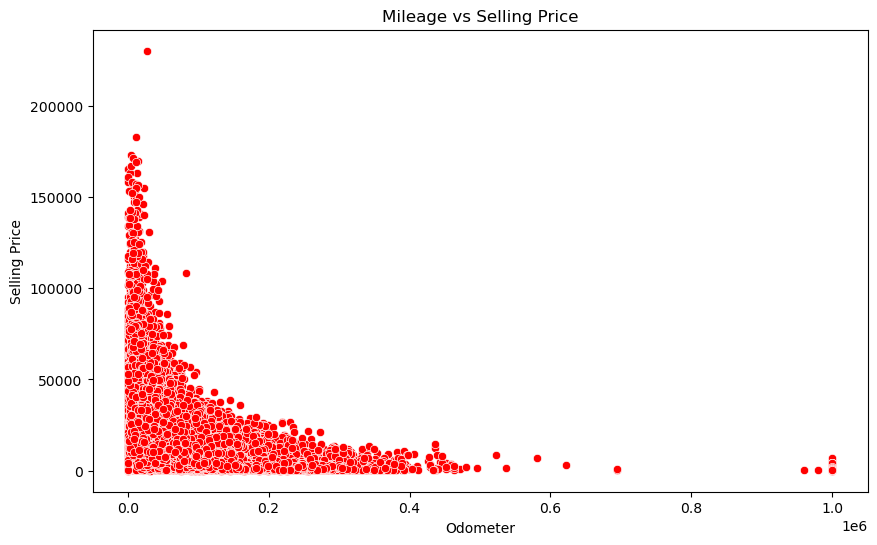

In [154]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='sellingprice', data=df, color='red')
plt.title('Mileage vs Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

# Most Common Colors of Cars Sold

In [156]:
top_colors = df['color'].value_counts().head(10)
top_colors

color
black     106605
white     101841
gray       80005
silver     79515
blue       48534
red        41637
—          24371
gold       10472
green      10361
beige       8592
Name: count, dtype: int64

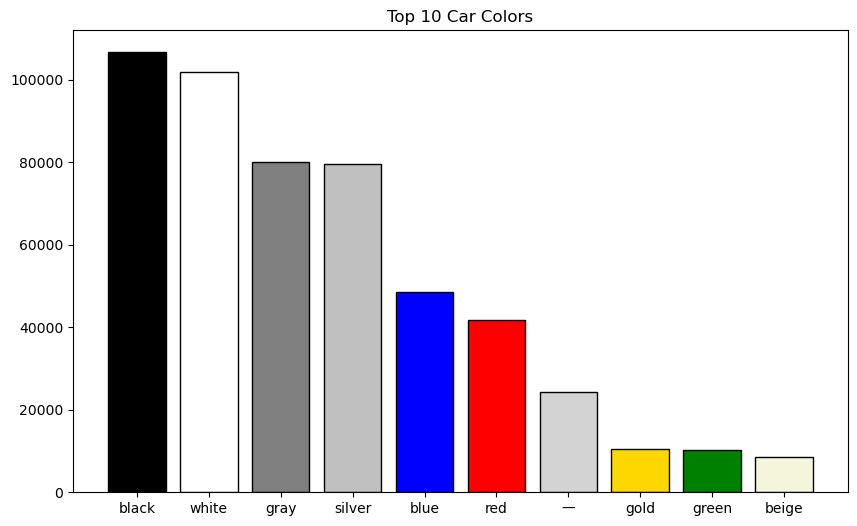

In [355]:
color_map = {
    'black': 'black',
    'white': 'white',
    'gray': 'gray',
    'silver': 'silver',
    'blue': 'blue',
    'red': 'red',
    '—': 'lightgray',  
    'gold': 'gold',
    'green': 'green',
    'beige': 'beige'
}

top_colors_2 = df['color'].value_counts().head(10)
bar_colors = [color_map.get(color, 'lightgray') for color in top_colors.index]
plt.figure(figsize=(10,6))
bars = plt.bar(top_colors.index, top_colors.values, color=bar_colors, edgecolor='black')
plt.title('Top 10 Car Colors')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Average Sales by Car Colors

In [364]:
average_sales_by_color = df.groupby('color')['sellingprice'].mean().reset_index().sort_values(by='sellingprice', ascending=False)
print(average_sales_by_color)

        color  sellingprice
19          —  17828.444216
5    charcoal  16470.045259
1       black  15710.478195
3       brown  15635.251348
10  off-white  15389.415594
17      white  15025.701928
7        gray  14131.608824
9        lime  13675.000000
11     orange  13185.496392
14        red  12976.249658
18     yellow  12765.200669
13     purple  12439.575491
4    burgundy  12242.007057
15     silver  12029.606011
12       pink  11823.170732
2        blue  11706.218960
0       beige   9727.705191
16  turquoise   8877.218605
8       green   8775.141106
6        gold   8632.117265


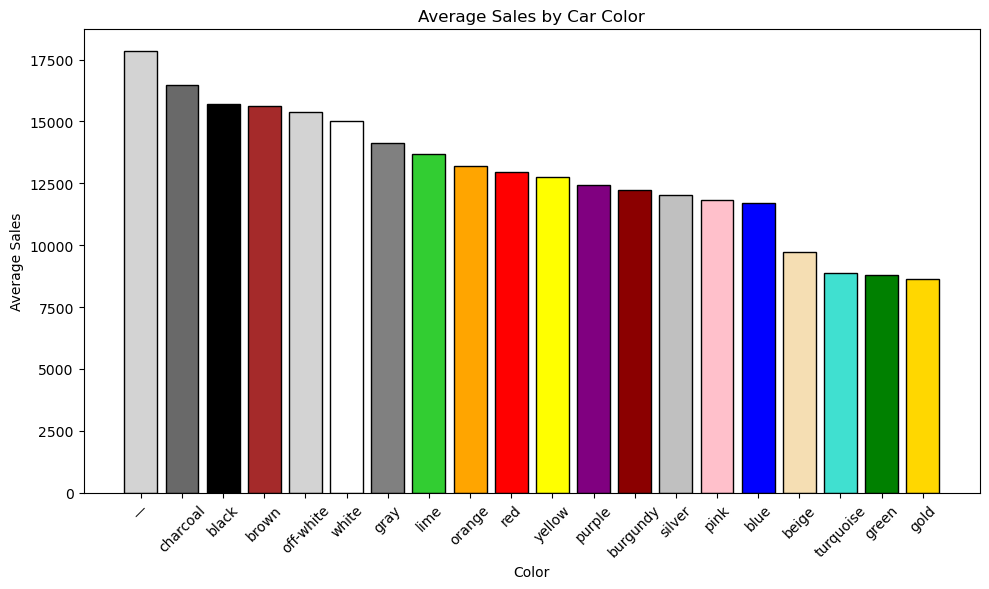

In [368]:
color_map = {
    'black': 'black',
    'white': 'white',
    'gray': 'gray',
    'silver': 'silver',
    'blue': 'blue',
    'red': 'red',
    'green': 'green',
    'yellow': 'yellow',
    'brown': 'brown',
    'pink': 'pink',
    'purple': 'purple',
    'orange': 'orange',
    'beige': 'wheat',
    'gold': 'gold',
    'burgundy': 'darkred',
    'lime': 'limegreen',
    'off-white': 'lightgray',
    'charcoal': 'dimgray',
    'turquoise': 'turquoise',
    '—': 'lightgray',  
}

bar_colors = average_sales_by_color['color'].map(color_map)
plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_color['color'], 
        average_sales_by_color['sellingprice'], 
        color=bar_colors,
        edgecolor='black') 
plt.xlabel('Color')
plt.ylabel('Average Sales')
plt.title('Average Sales by Car Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most Common Interior Colors

In [162]:
most_common_interior_colors = df['interior'].value_counts().reset_index()
most_common_interior_colors.columns = ['interior_color', 'count']
most_common_interior_colors

interior_color   count
0           black  238670
1            gray  170431
2           beige   57871
3             tan   41705
4               —   11427
5           brown    8298
6             red    1298
7          silver    1053
8            blue    1013
9       off-white     469
10         purple     326
11           gold     313
12          white     239
13          green     223
14       burgundy     184
15         orange     134
16         yellow      19

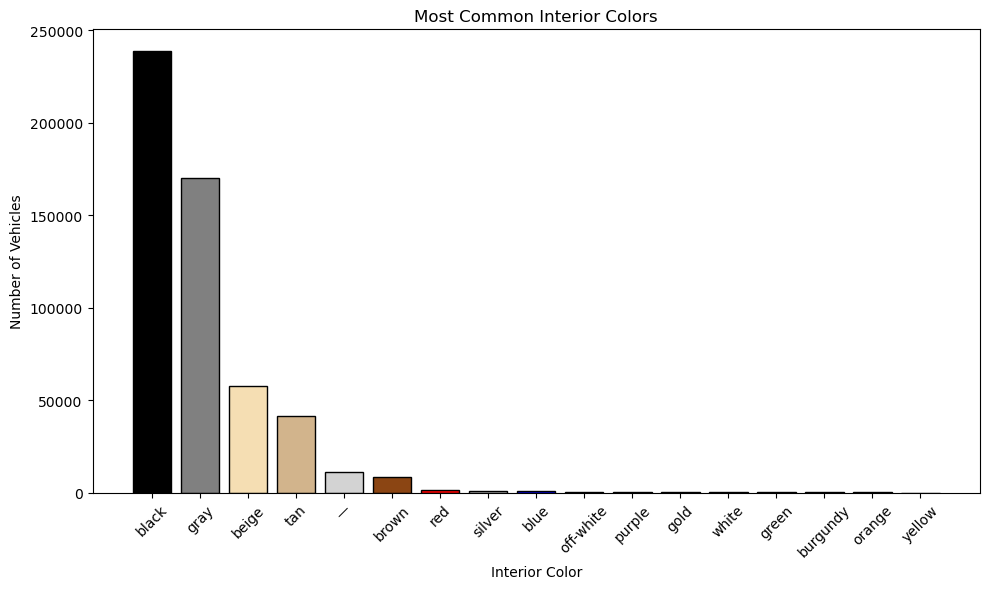

In [487]:
interior_color_map = {
    'black': 'black',
    'gray': 'gray',
    'beige': 'wheat',
    'tan': 'tan',
    '—': 'lightgray',  
    'brown': 'saddlebrown',
    'red': 'red',
    'silver': 'silver',
    'blue': 'blue',
    'off-white': 'ivory',
    'purple': 'purple',
    'gold': 'gold',
    'white': 'white',
    'green': 'green',
    'burgundy': 'darkred',
    'orange': 'orange',
    'yellow': 'yellow',
}

bar_colors = most_common_interior_colors['interior_color'].map(interior_color_map)
plt.figure(figsize=(10, 6))
plt.bar(most_common_interior_colors['interior_color'], 
        most_common_interior_colors['count'], 
        color=bar_colors, 
        edgecolor='black') 
plt.xlabel('Interior Color')
plt.ylabel('Number of Vehicles')
plt.title('Most Common Interior Colors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Selling Price by Interior Color

In [165]:
avg_price_by_interior = df.groupby('interior')['sellingprice'].mean().sort_values(ascending=False).head(10)
avg_price_by_interior

interior
off-white    29103.678038
red          24513.270416
brown        20617.121716
orange       20383.955224
burgundy     20317.663043
white        19133.794979
yellow       18226.315789
black        15769.545016
purple       13551.613497
beige        13523.060047
Name: sellingprice, dtype: float64

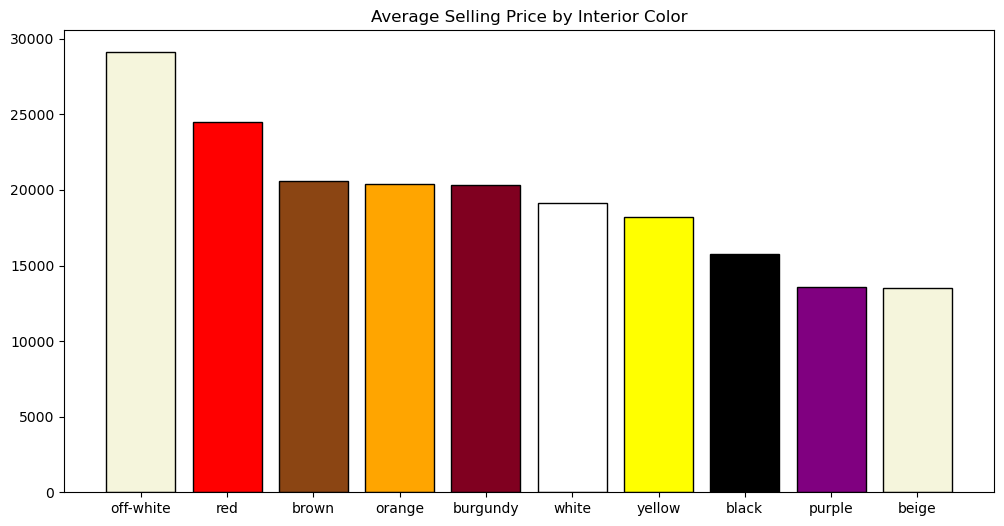

In [375]:
interior_color_map = {
    'off-white': '#f5f5dc',
    'red': 'red',
    'brown': '#8b4513',
    'orange': 'orange',
    'burgundy': '#800020',
    'white': 'white',
    'yellow': 'yellow',
    'black': 'black',
    'purple': 'purple',
    'beige': 'beige'
}

bar_colors = [interior_color_map.get(color, 'lightgray') for color in avg_price_by_interior.index]

plt.figure(figsize=(12,6))
bars = plt.bar(avg_price_by_interior.index, avg_price_by_interior.values, color=bar_colors, edgecolor='black')
plt.title('Average Selling Price by Interior Color')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Total Sales by Body Type

In [490]:
sales_by_body_type = df.groupby('body')['sellingprice'].sum().reset_index()
sales_by_body_type = sales_by_body_type.sort_values(by='sellingprice', ascending=False)
sales_by_body_type

body  sellingprice
36                    sedan  2.790815e+09
39                      suv  2.288570e+09
7                  crew cab  3.494388e+08
28                  minivan  2.920321e+08
6                     coupe  2.784983e+08
24                hatchback  2.606898e+08
38                supercrew  1.973778e+08
5               convertible  1.830820e+08
43                    wagon  1.610046e+08
19                  g sedan  1.478114e+08
37                 supercab  6.672327e+07
42                      van  6.250138e+07
32                 quad cab  5.669688e+07
34              regular cab  4.860535e+07
16             extended cab  4.858125e+07
13               double cab  3.660388e+07
18                  g coupe  3.572240e+07
14             e-series van  3.478310e+07
8               crewmax cab  1.459055e+07
17            g convertible  8.482550e+06
25                 king cab  4.933655e+06
22            genesis coupe  4.619400e+06
0                access cab  3.930000e+06
9                 cts coupe  3.631000e+06
27                 mega cab  3.215250e+06
26                     koup  1.738800e+06
30          q60 convertible  1.498850e+06
29      promaster cargo van  1.347600e+06
11              cts-v coupe  1.304621e+06
15            elantra coupe  1.262450e+06
31                q60 coupe  1.067800e+06
1        beetle convertible  1.052000e+06
23  granturismo convertible  9.922500e+05
4                  club cab  8.166100e+05
41          tsx sport wagon  6.729000e+05
40              transit van  4.526500e+05
20          g37 convertible  4.035500e+05
35              regular-cab  2.620000e+05
44                  xtracab  2.397500e+05
10                cts wagon  2.286000e+05
21                g37 coupe  1.863500e+05
12              cts-v wagon  5.050000e+04
3                cab plus 4  4.990000e+04
2                  cab plus  9.800000e+03
33                  ram van  1.200000e+03

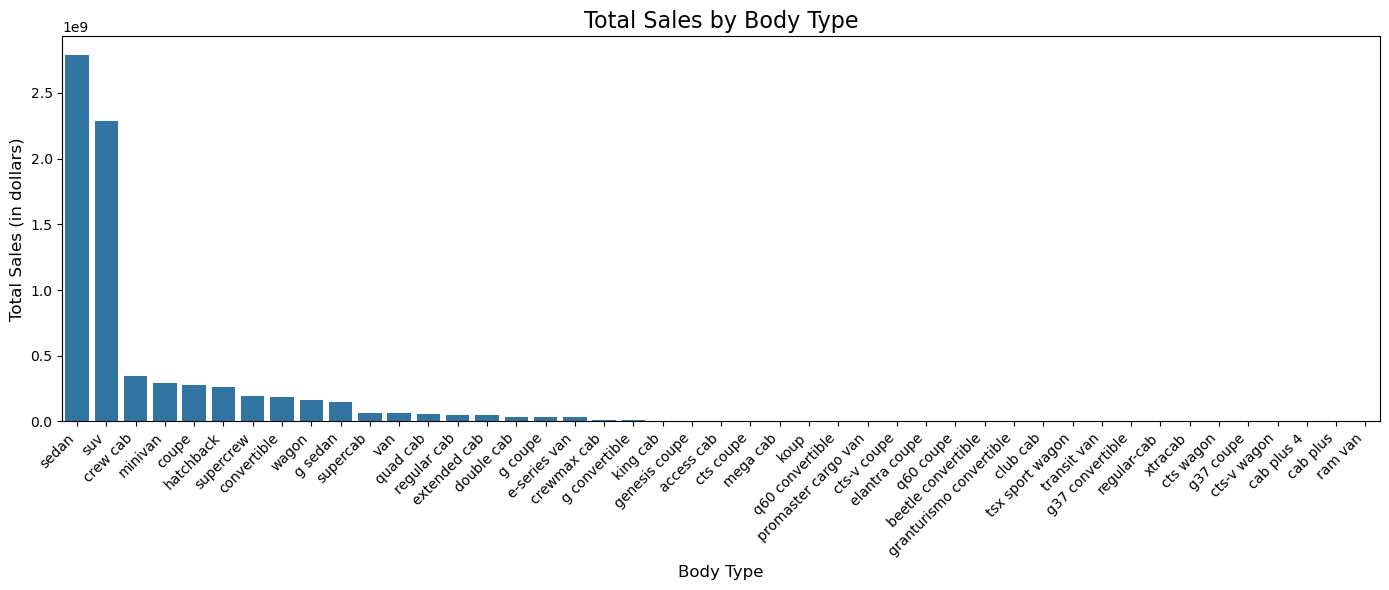

In [496]:
plt.figure(figsize=(14, 6))
sns.barplot(x='body', y='sellingprice', data=sales_by_body_type)
plt.title('Total Sales by Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Total Sales (in dollars)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Popularity of Body Type

In [499]:
most_common_body_type = df['body'].value_counts().reset_index()
most_common_body_type.columns = ['body_type', 'count']
most_common_body_type

body_type   count
0                     sedan  236446
1                       suv  140535
2                 hatchback   25738
3                   minivan   24873
4                     coupe   17248
5                  crew cab   15999
6                     wagon   15681
7               convertible   10181
8                 supercrew    8875
9                   g sedan    7412
10                 supercab    5149
11              regular cab    4694
12                      van    4471
13             extended cab    4309
14                 quad cab    3980
15             e-series van    1820
16                  g coupe    1592
17               double cab    1577
18              crewmax cab     550
19                 king cab     513
20            g convertible     323
21            genesis coupe     293
22               access cab     289
23                     koup     179
24                 club cab     165
25                cts coupe     158
26                 mega cab     111
27            elantra coupe     103
28      promaster cargo van      59
29       beetle convertible      58
30                  xtracab      42
31          q60 convertible      41
32          tsx sport wagon      36
33                q60 coupe      36
34              cts-v coupe      34
35          g37 convertible      20
36              transit van      19
37              regular-cab      15
38                cts wagon      13
39  granturismo convertible      13
40                g37 coupe      12
41               cab plus 4       6
42                 cab plus       3
43              cts-v wagon       1
44                  ram van       1

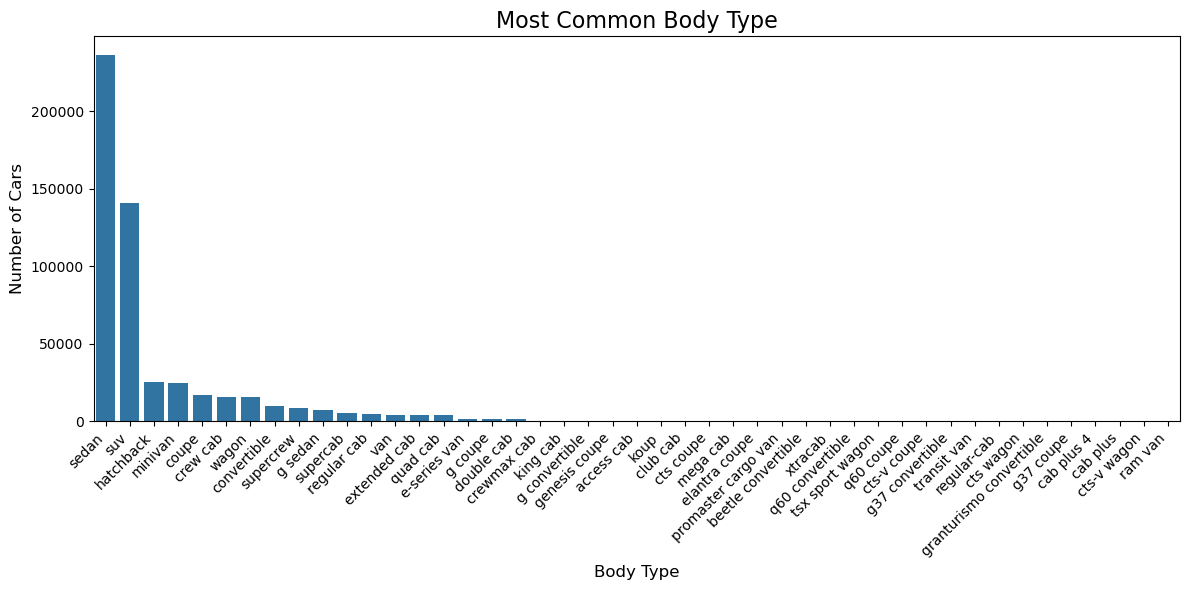

In [503]:
plt.figure(figsize=(12, 6))
sns.barplot(x='body_type', y='count', data=most_common_body_type)
plt.title('Most Common Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Selling Price Body Type
This was carried out due to duplicates. I  am leaving this here for future reference just incase I run into this error again

In [168]:
df['body'] = df['body'].str.lower().str.strip()
avg_price_by_body = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False)
avg_price_by_body

body
granturismo convertible    76326.923077
cts-v wagon                50500.000000
cts-v coupe                38371.205882
q60 convertible            36557.317073
q60 coupe                  29661.111111
mega cab                   28966.216216
crewmax cab                26528.272727
g convertible              26261.764706
transit van                23823.684211
double cab                 23211.082435
cts coupe                  22981.012658
promaster cargo van        22840.677966
g coupe                    22438.693467
supercrew                  22239.750310
crew cab                   21841.287393
g37 convertible            20177.500000
g sedan                    19942.175661
e-series van               19111.593956
tsx sport wagon            18691.666667
beetle convertible         18137.931034
convertible                17982.708084
cts wagon                  17584.615385
regular-cab                17466.666667
suv                        16284.698765
coupe                      16146.69

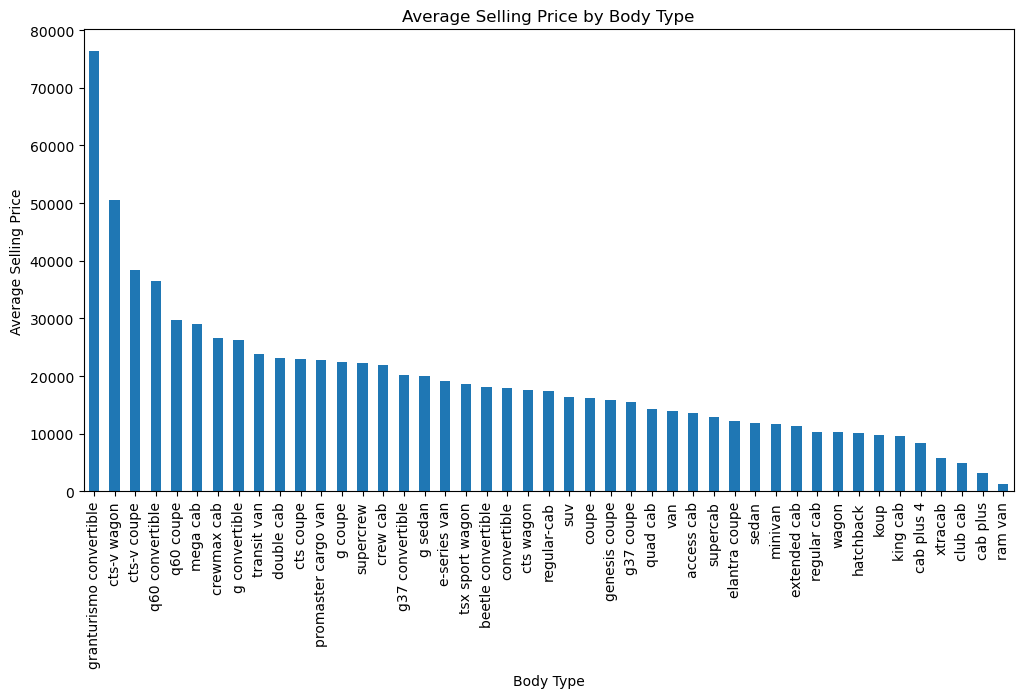

In [169]:
plt.figure(figsize=(12,6))
avg_price_by_body.plot(kind='bar')
plt.title('Average Selling Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price')
plt.show()

# Sales by State

In [171]:
total_sales_by_state = df.groupby('state')['sellingprice'].sum().sort_values(ascending=False)
total_sales_by_state

state
fl    1.125653e+09
ca    1.025096e+09
pa    8.415546e+08
tx    5.890136e+08
ga    4.374288e+08
nj    3.678173e+08
tn    3.497428e+08
il    3.367801e+08
oh    3.025805e+08
mo    2.282725e+08
mi    2.275872e+08
nv    1.852971e+08
nc    1.844415e+08
wi    1.342555e+08
mn    1.261313e+08
co    1.215121e+08
wa    1.013708e+08
va    9.939407e+07
az    9.555400e+07
md    8.034645e+07
ny    6.071876e+07
on    5.286345e+07
ne    4.885090e+07
in    4.524990e+07
ma    4.399748e+07
sc    4.210148e+07
pr    2.537675e+07
ut    2.156924e+07
ms    2.061504e+07
la    2.030566e+07
qc    1.528590e+07
hi    1.496210e+07
or    1.322935e+07
ab    9.418900e+06
nm    1.056600e+06
ns    4.619000e+05
ok    4.503500e+05
al    2.360000e+05
Name: sellingprice, dtype: float64

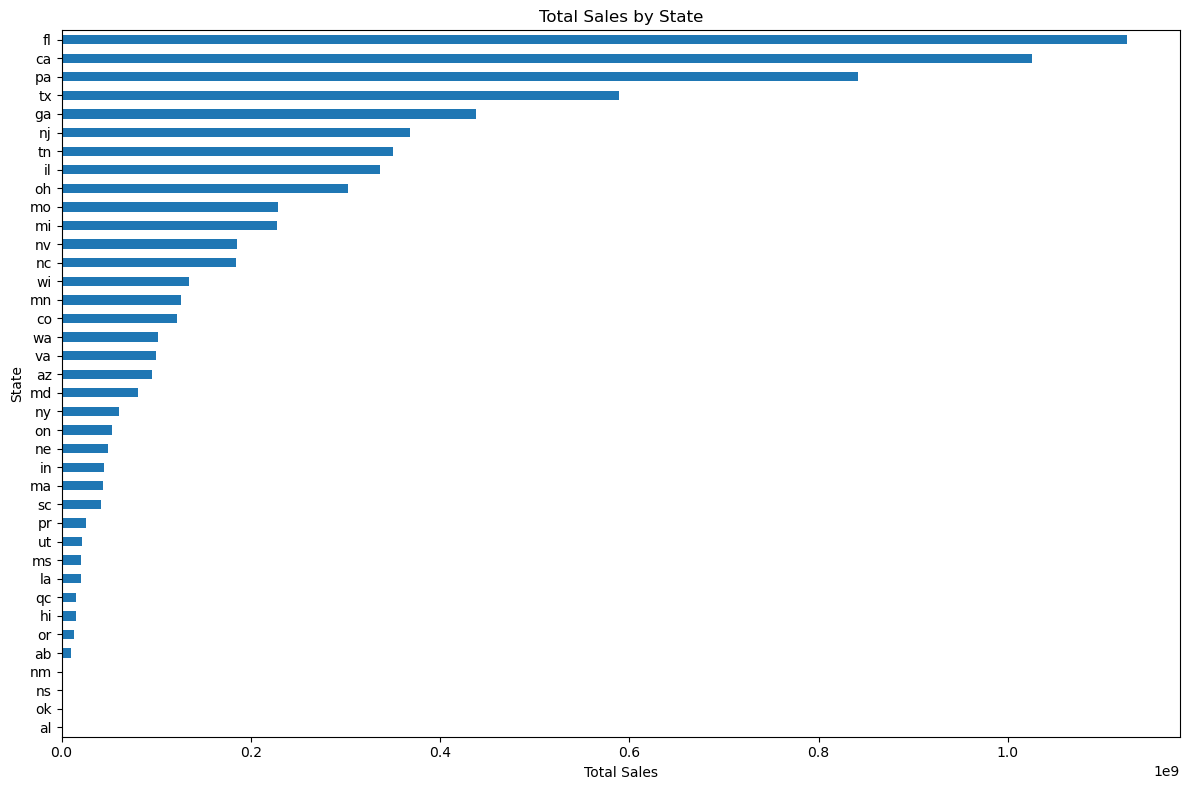

In [408]:
plt.figure(figsize=(12, 8))
df.groupby('state')['sellingprice'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Top Selling Car Models by State

In [402]:
model_sales_by_state = df.groupby(['state', 'model'])['sellingprice'].sum().reset_index()
model_sales_by_state = model_sales_by_state.sort_values(by=['state', 'sellingprice'], ascending=[True, False])
top_selling_models_by_state = model_sales_by_state.groupby('state').first().reset_index()
top_selling_models_by_state = top_selling_models_by_state.sort_values(by='sellingprice', ascending=True)
top_selling_models_by_state

state             model  sellingprice
1     al           G Sedan       36300.0
21    ns            Verano       41100.0
25    ok             F-150       53600.0
20    nm          Suburban       62600.0
7     hi             F-150      501850.0
27    or             F-150      589200.0
10    la             F-150      858600.0
31    sc    Silverado 1500     1154450.0
11    ma             Camry     1289900.0
30    qc            Escape     1444600.0
18    ne             F-150     2172600.0
16    ms             F-150     2194500.0
29    pr             Yaris     2259200.0
9     in             Pilot     2544400.0
0     ab             F-150     2690400.0
2     az             Camry     2954600.0
12    md             Camry     3220200.0
34    ut             F-150     3509850.0
23    ny          Explorer     5705975.0
36    wa             F-150     5722230.0
37    wi           C-Class     6150350.0
26    on               300     6350700.0
35    va  Town and Country     6362350.0
4     co             F-150     6420400.0
22    nv          3 Series     8483025.0
14    mn             F-150     8575550.0
17    nc             Camry     9586202.0
24    oh          3 Series    14130950.0
15    mo            Escape    14856275.0
6     ga             F-150    16489600.0
8     il            Altima    19622411.0
19    nj            Altima    19684153.0
32    tn             F-150    22000625.0
28    pa            Altima    27023115.0
13    mi             F-150    30931935.0
33    tx             F-150    34912201.0
3     ca          3 Series    39141645.0
5     fl            Altima    40106703.0

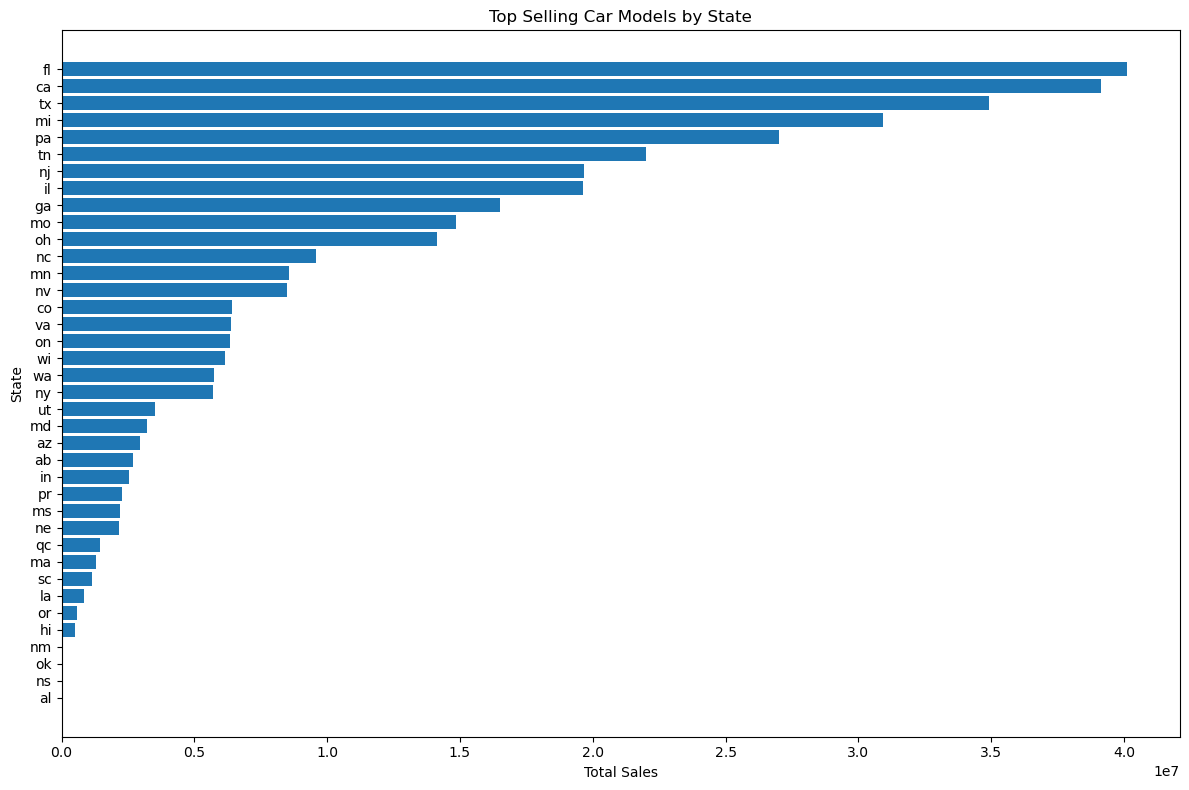

In [404]:
plt.figure(figsize=(12, 8))
plt.barh(top_selling_models_by_state['state'], top_selling_models_by_state['sellingprice'])
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Top Selling Car Models by State')
plt.tight_layout()
plt.show()

# Top Selling Car Models by State by Volume

In [413]:
top_models_by_state = df.groupby(['state', 'make', 'model']).size().reset_index(name='counts')
top_models_by_state = top_models_by_state.sort_values(['state', 'counts'], ascending=[True, False]).groupby('state').head(3)
top_models_by_state = top_models_by_state.sort_values(by='counts', ascending=False)
top_models_by_state

state       make                model  counts
2280     fl     Nissan               Altima    3487
2393     fl     Toyota                Camry    2842
1164     ca     Nissan               Altima    2760
10962    pa     Nissan               Altima    2216
680      ca        BMW             3 Series    2214
...     ...        ...                  ...     ...
8546     ns      Buick                Regal       3
10061    ok  Chevrolet     Silverado 2500HD       3
146      al       Ford  Explorer Sport Trac       2
145      al       Ford           Expedition       2
137      al  Chevrolet                Cruze       2

[114 rows x 4 columns]

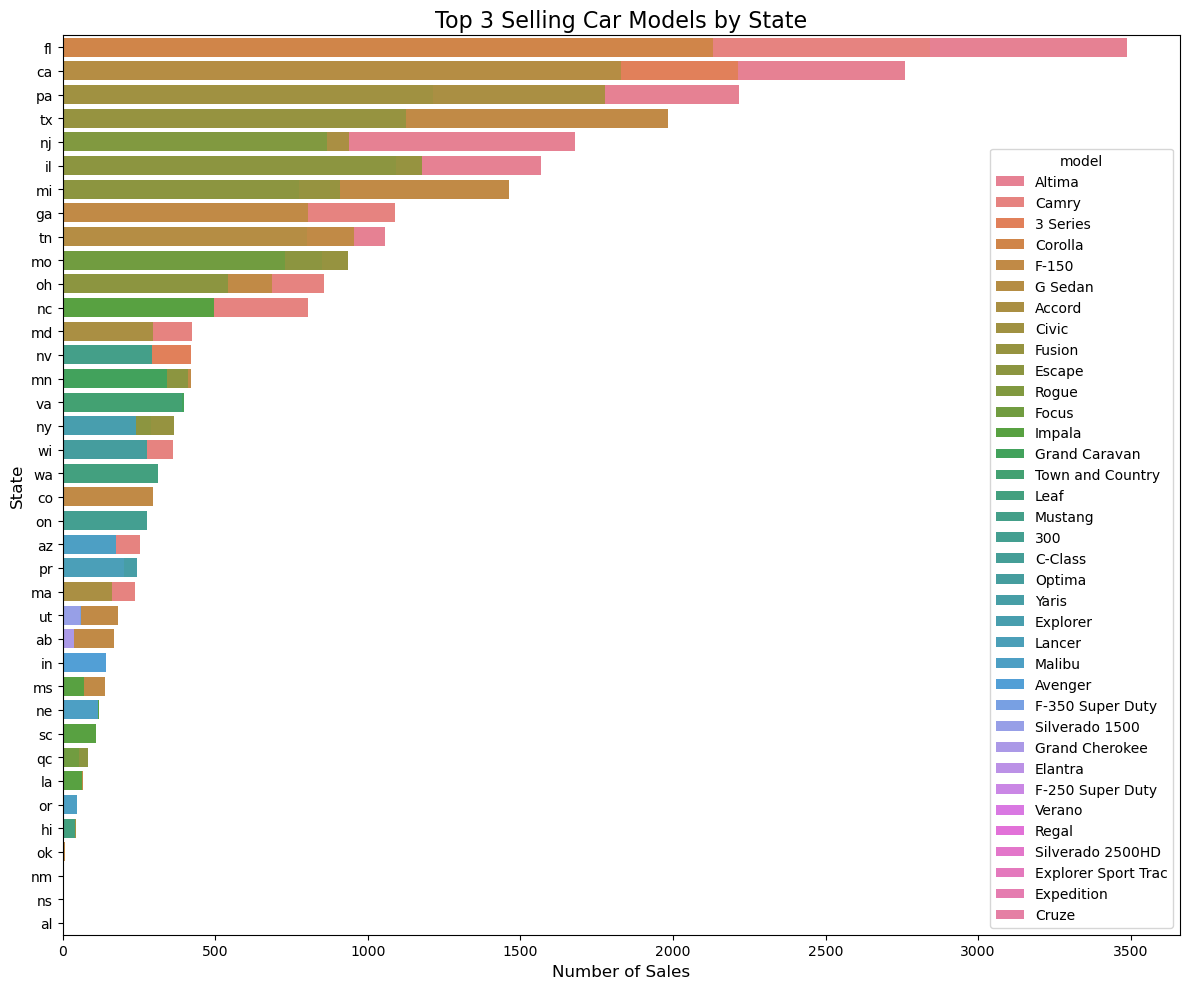

In [415]:
plt.figure(figsize=(12, 10))
sns.barplot(x='counts', y='state', hue='model', data=top_models_by_state, dodge=False)
plt.title('Top 3 Selling Car Models by State', fontsize=16)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

# Seasonal Patterns in Sales by State

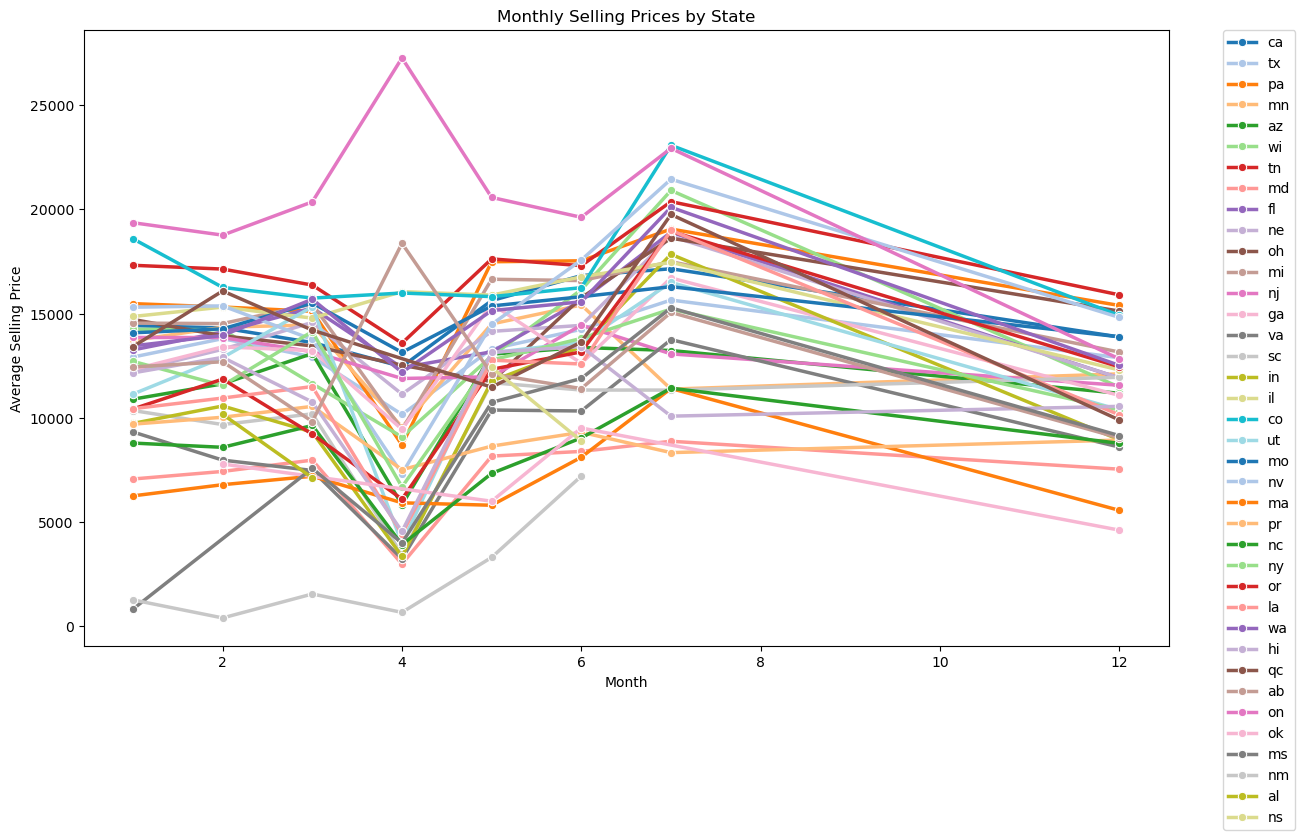

In [182]:
palette = sns.color_palette("tab20", n_colors=len(df['state'].unique()))
plt.figure(figsize=(14,8))
sns.lineplot(x='month', y='sellingprice', hue='state', data=df, errorbar=None, palette=palette, linewidth=2.5, marker='o')
plt.title('Monthly Selling Prices by State')
plt.xlabel('Month')
plt.ylabel('Average Selling Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

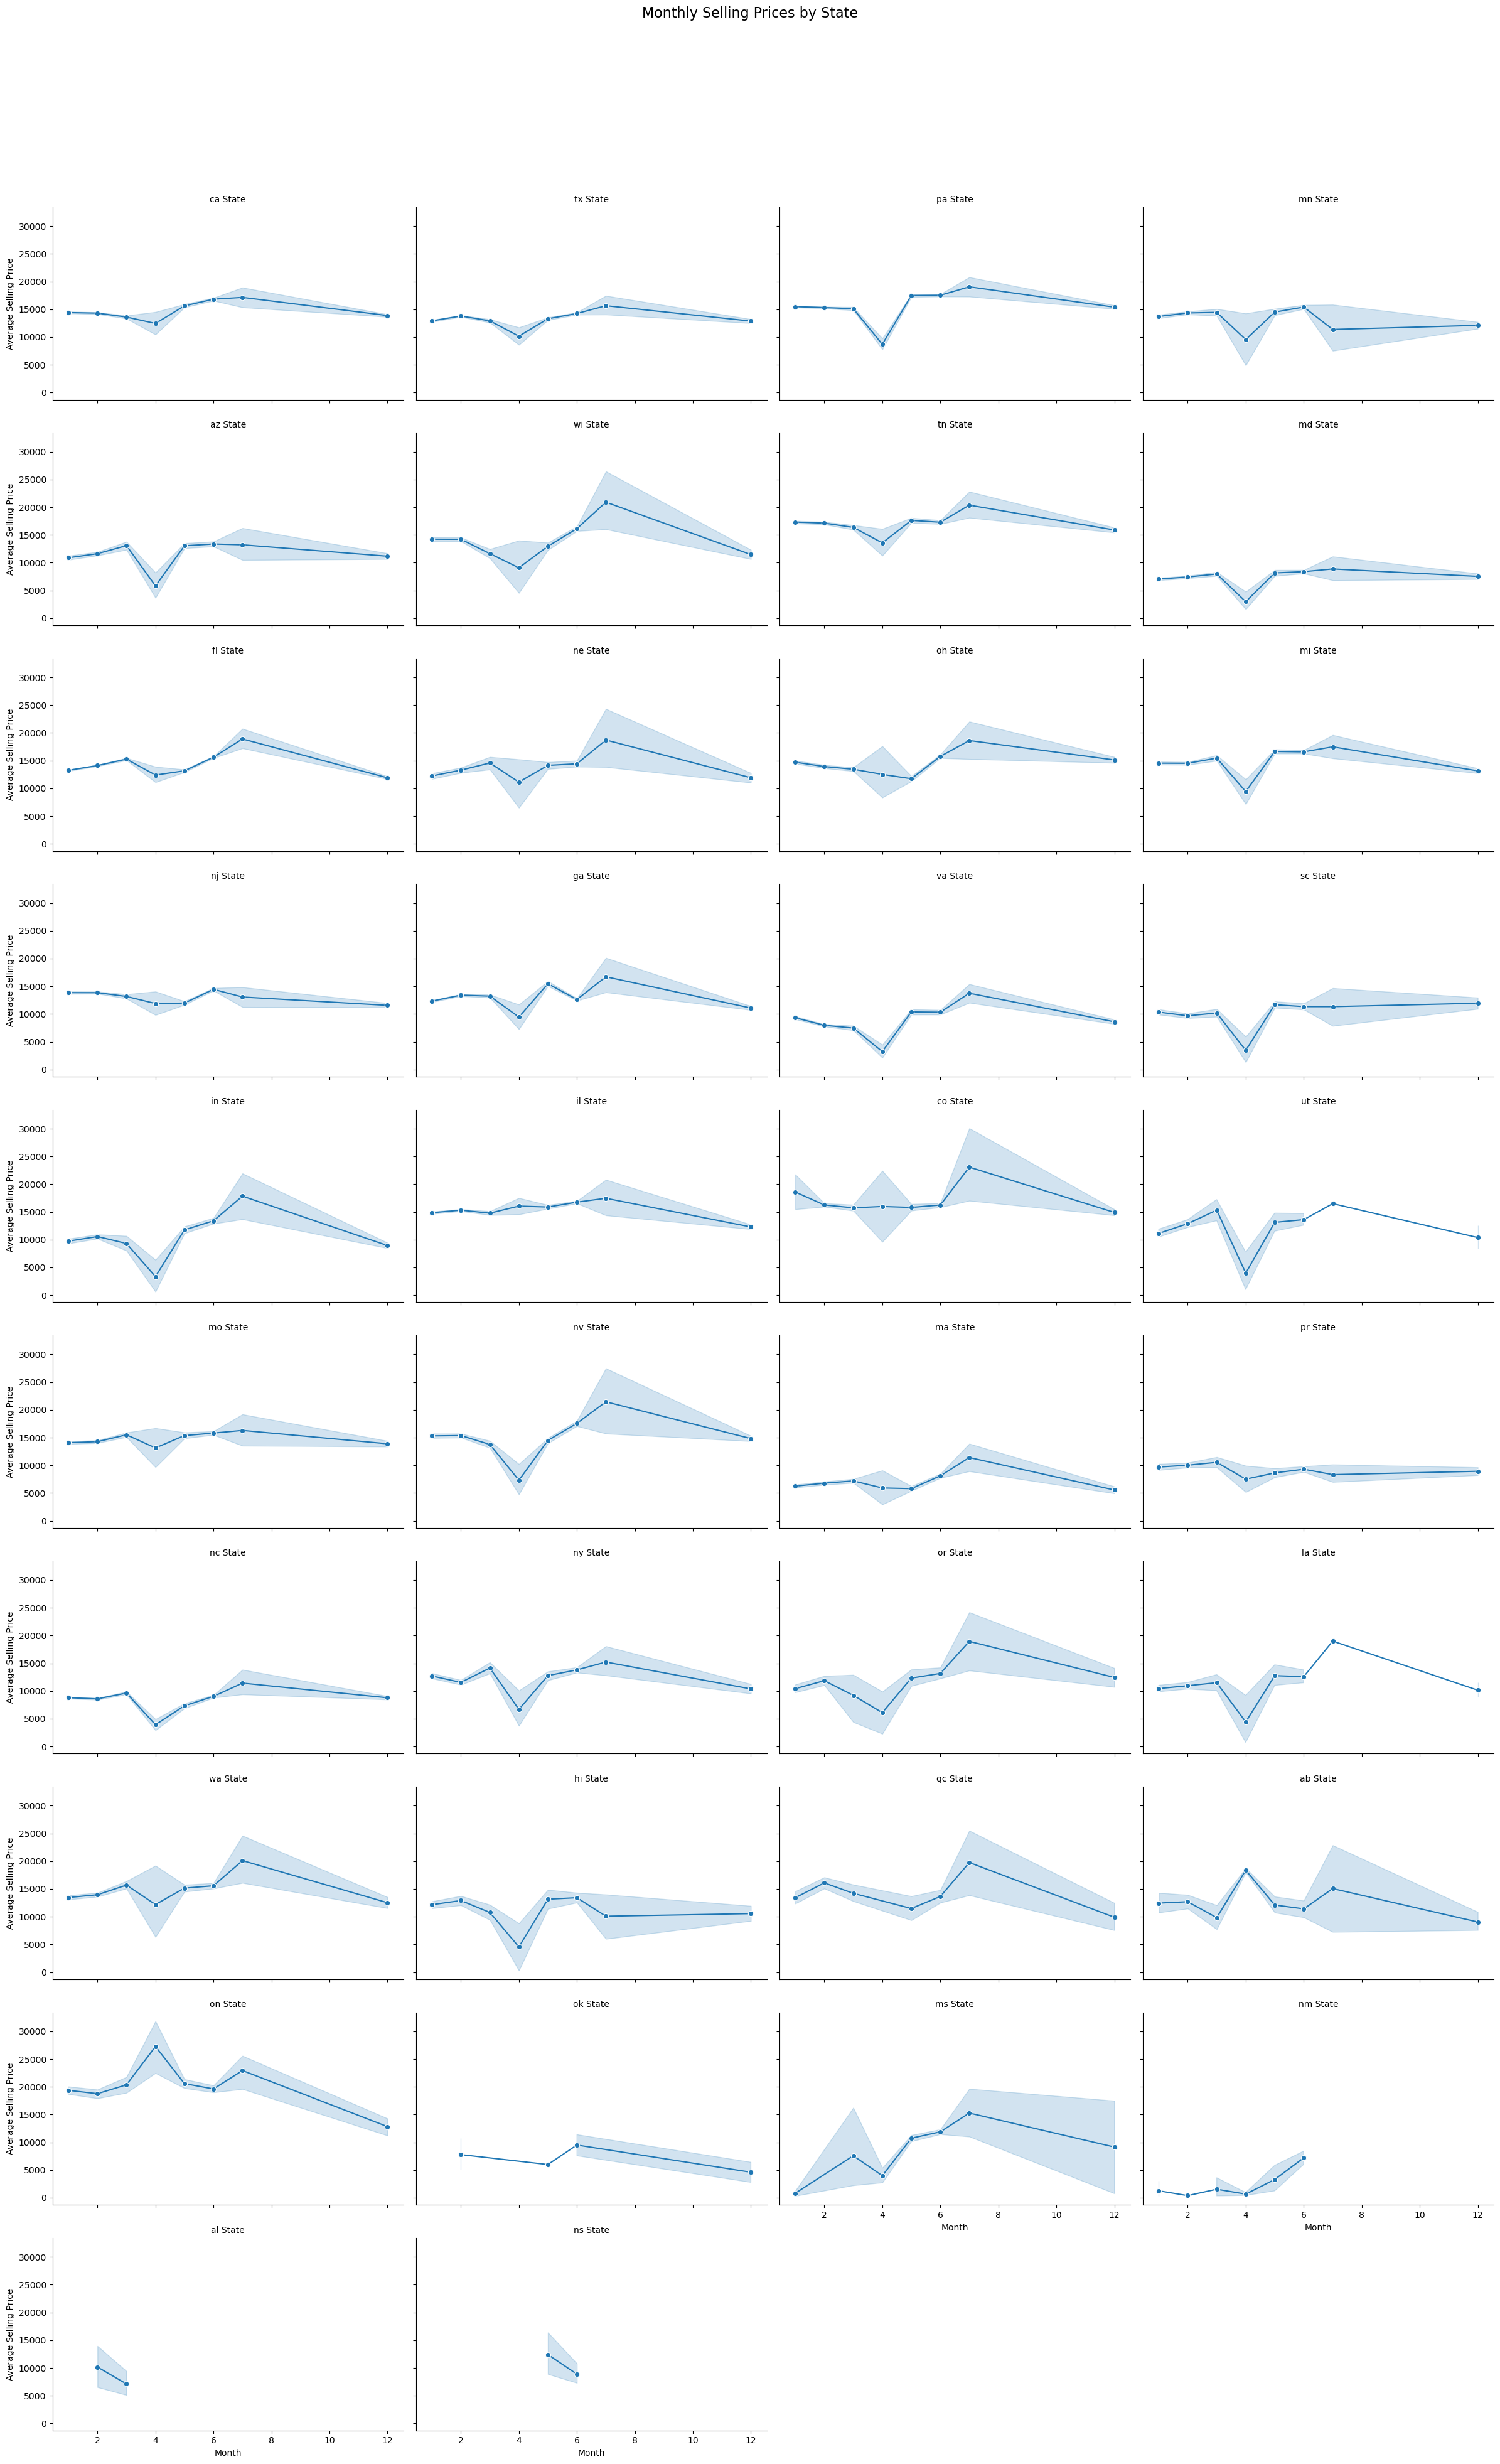

In [312]:
g = sns.FacetGrid(df, col="state", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "month", "sellingprice", marker="o")
g.set_axis_labels("Month", "Average Selling Price")
g.set_titles("{col_name} State")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Selling Prices by State', fontsize=16)
plt.show()

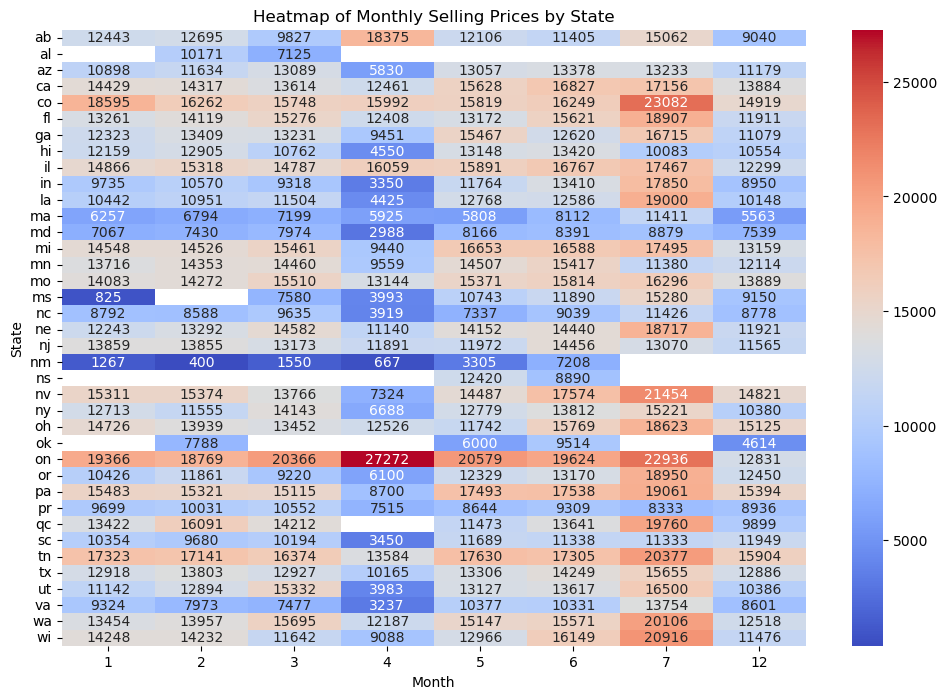

In [336]:
df_pivot = df.pivot_table(values='sellingprice', index='state', columns='month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap="coolwarm", annot=True, fmt=".0f")
plt.title('Heatmap of Monthly Selling Prices by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()

# Transmission Type Distribution

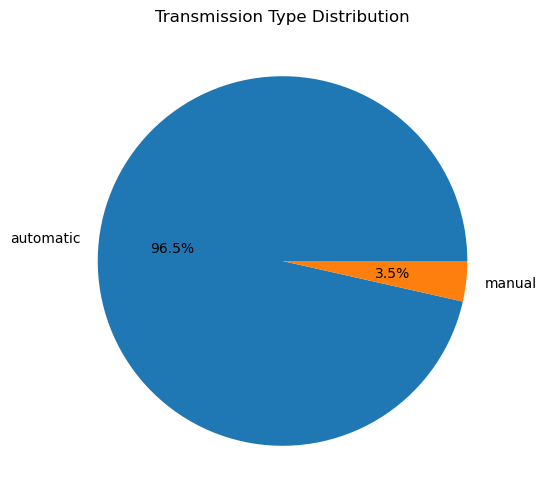

In [184]:
plt.figure(figsize=(10,6))
df['transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Transmission Type Distribution')
plt.ylabel('')
plt.show()

# Condition Distribution by Transmission Type

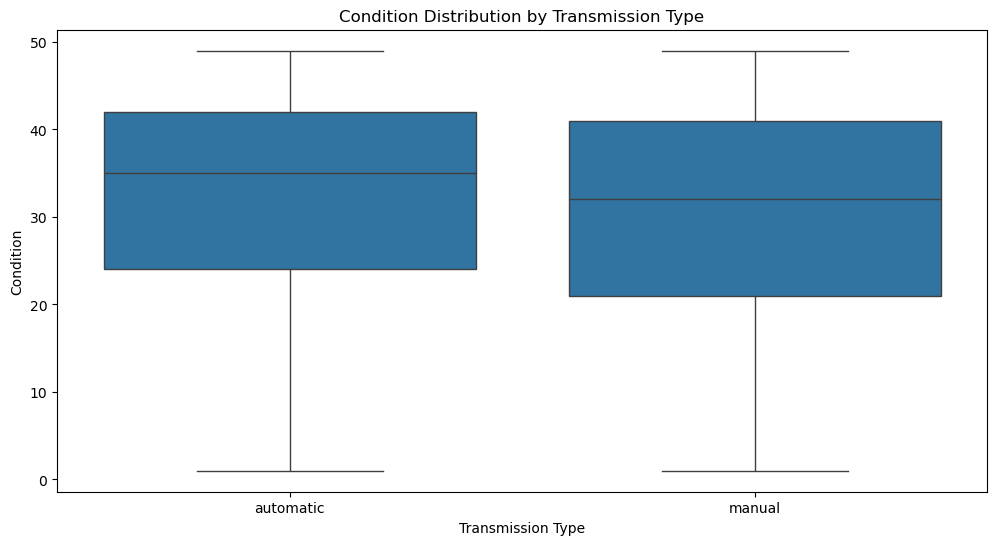

In [186]:
plt.figure(figsize=(12,6))
sns.boxplot(x='transmission', y='car_condition', data=df)
plt.title('Condition Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Condition')
plt.show()

# Relationship Between MMR Value and Selling Price

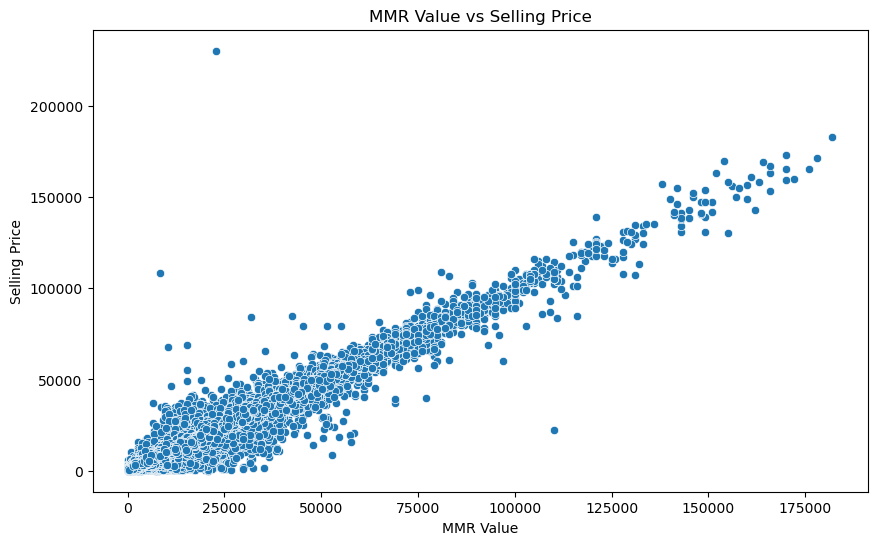

In [188]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mmr', y='sellingprice', data=df)
plt.title('MMR Value vs Selling Price')
plt.xlabel('MMR Value')
plt.ylabel('Selling Price')
plt.show()

# Condition of Cars Sold by Year

In [210]:
avg_condition_by_year = df.groupby('year')['car_condition'].mean()
avg_condition_by_year

year
1990     1.825000
1991     1.894737
1992     1.756757
1993     1.883871
1994     1.796296
1995     1.777972
1996     1.757622
1997    15.471667
1998    15.851166
1999    17.347942
2000    18.651531
2001    19.642821
2002    21.163247
2003    22.324444
2004    23.414123
2005    24.216132
2006    25.257300
2007    26.927593
2008    28.220517
2009    29.224551
2010    30.849169
2011    33.186110
2012    34.545586
2013    35.166986
2014    32.134102
2015    30.037281
Name: car_condition, dtype: float64

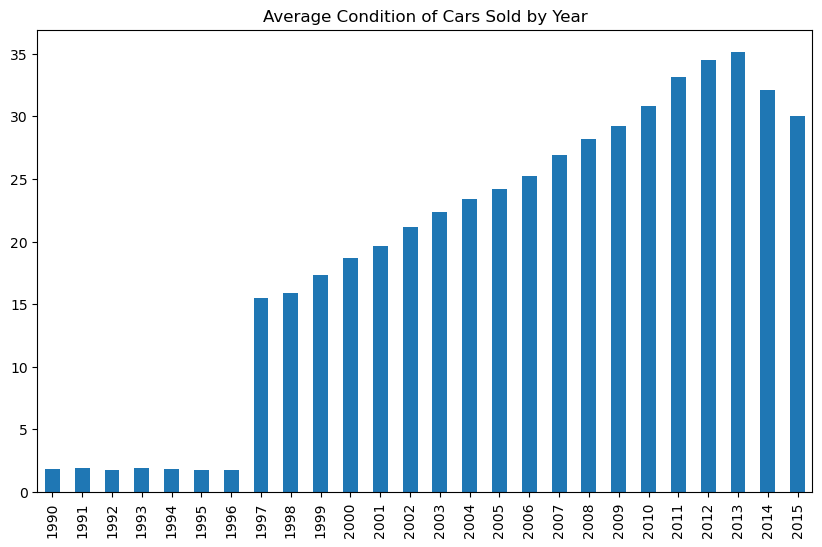

In [422]:
plt.figure(figsize=(10,6))
avg_condition_by_year.plot(kind='bar')
plt.title('Average Condition of Cars Sold by Year')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Relationship Between Odometer(Mileage) and Condition

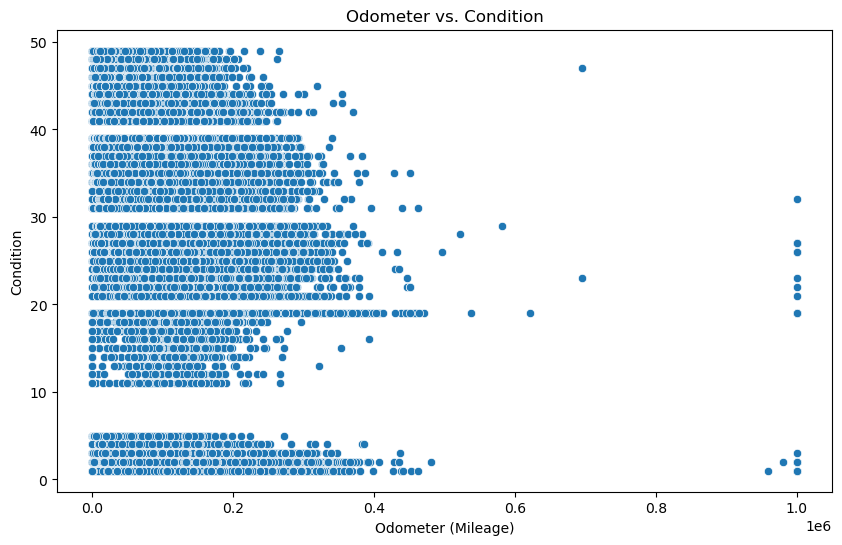

In [213]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='car_condition', data=df)
plt.title('Odometer vs. Condition')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Condition')
plt.show()

# Top 10 Sellers 

In [430]:
seller_sales = df.groupby('seller')['sellingprice'].sum().reset_index()
top_sellers = seller_sales.sort_values(by='sellingprice', ascending=False).head(10)
top_sellers

seller  sellingprice
4661            ford motor credit company llc   339598075.0
8247                       nissan-infiniti lt   271891060.0
11388                   the hertz corporation   250391005.0
8217                       nissan infiniti lt   215965671.0
1367                         avis corporation   202954780.0
4391   financial services remarketing (lease)   161021025.0
7527         mercedes-benz financial services   146572550.0
4067           enterprise veh exchange/rental   125880087.0
10438                      santander consumer   119599190.0
11269                        tdaf remarketing   114284575.0

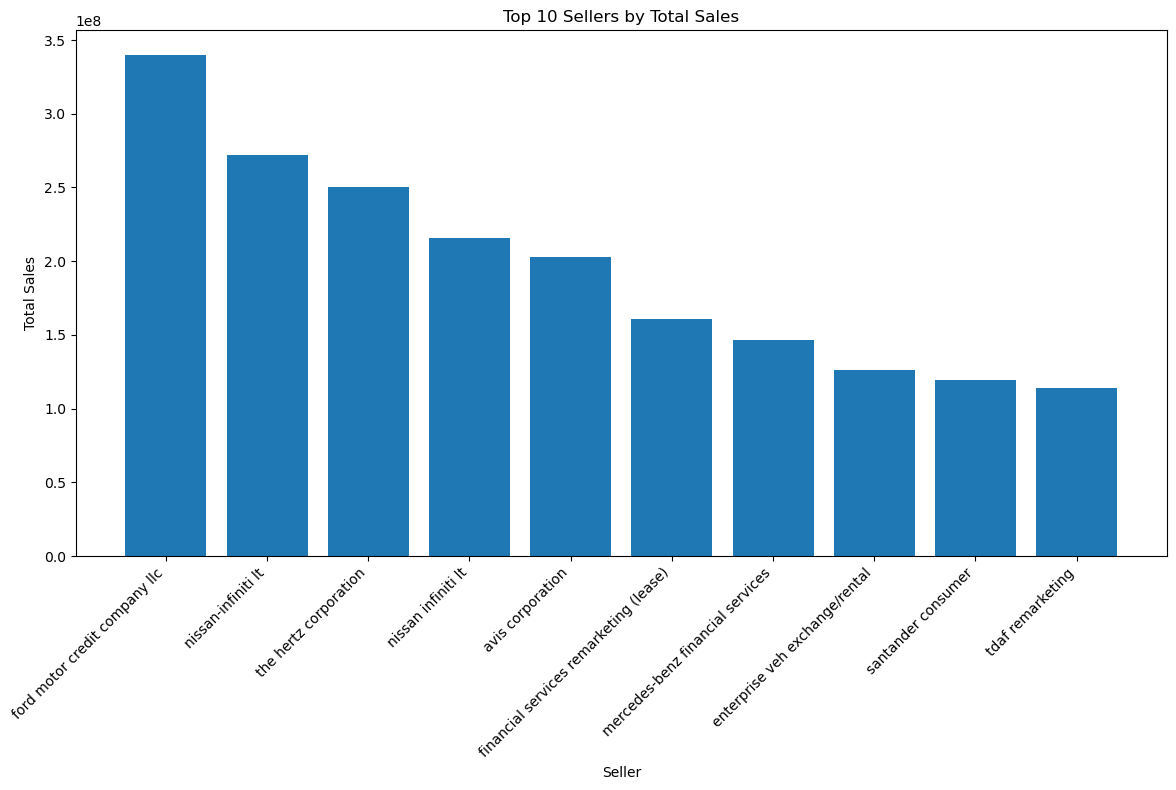

In [434]:
plt.figure(figsize=(12, 8))
plt.bar(top_sellers['seller'], top_sellers['sellingprice'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Seller')
plt.ylabel('Total Sales')
plt.title('Top 10 Sellers by Total Sales')
plt.tight_layout()
plt.show()

# Top Sellers by State

In [436]:
sales_by_seller_state = df.groupby(['state', 'seller'])['sellingprice'].sum().reset_index()
sales_by_seller_state = sales_by_seller_state.sort_values(by=['state', 'sellingprice'], ascending=[True, False])
top_sellers_by_state = sales_by_seller_state.groupby('state').first().reset_index()
top_sellers_by_state = top_sellers_by_state.sort_values(by='sellingprice', ascending=False)
top_sellers_by_state

state                                  seller  sellingprice
28    pa            r hollenshead auto sales inc    94725300.0
3     ca  financial services remarketing (lease)    68222475.0
8     il           ford motor credit company llc    57640375.0
5     fl                lexus financial services    54905000.0
19    nj                      nissan-infiniti lt    41759650.0
33    tx                        avis corporation    40053250.0
13    mi           ford motor credit company llc    37646150.0
32    tn                       wholesale inc # 2    35008545.0
23    ny           ford motor credit company llc    25655600.0
24    oh               toyota financial services    21781200.0
15    mo           ford motor credit company llc    21002150.0
26    on                          fca canada inc    16986300.0
6     ga  financial services remarketing (lease)    16731100.0
22    nv                            unique autos    14700250.0
37    wi        mercedes-benz financial services    14557500.0
14    mn                             select lane    13277900.0
35    va          enterprise veh exchange/rental    12720401.0
2     az                   the hertz corporation    12500650.0
17    nc                      santander consumer    12050900.0
29    pr                           oriental bank     9707700.0
4     co                        avis corporation     9139500.0
18    ne   enterprise vehicle exchange/davenport     8990550.0
31    sc          enterprise veh exchange/rental     7976450.0
9     in                        chrysler capital     7479300.0
34    ut                      excell auto center     7045800.0
12    md             wells fargo dealer services     6919200.0
36    wa                                xcar inc     6898705.0
11    ma                   the hertz corporation     6501950.0
30    qc            ford motor company of canada     5736600.0
10    la                   the hertz corporation     5305018.0
16    ms           ford motor credit company llc     2789100.0
7     hi    ahfc/honda lease trust/hvt  inc. eot     2082100.0
27    or                            gm financial     1682400.0
0     ab                     chrysler canada inc     1507250.0
20    nm                   the hertz corporation      259650.0
25    ok               ge capital fleet services      220600.0
21    ns                            financialinx      196000.0
1     al                    meridian remarketing       85300.0

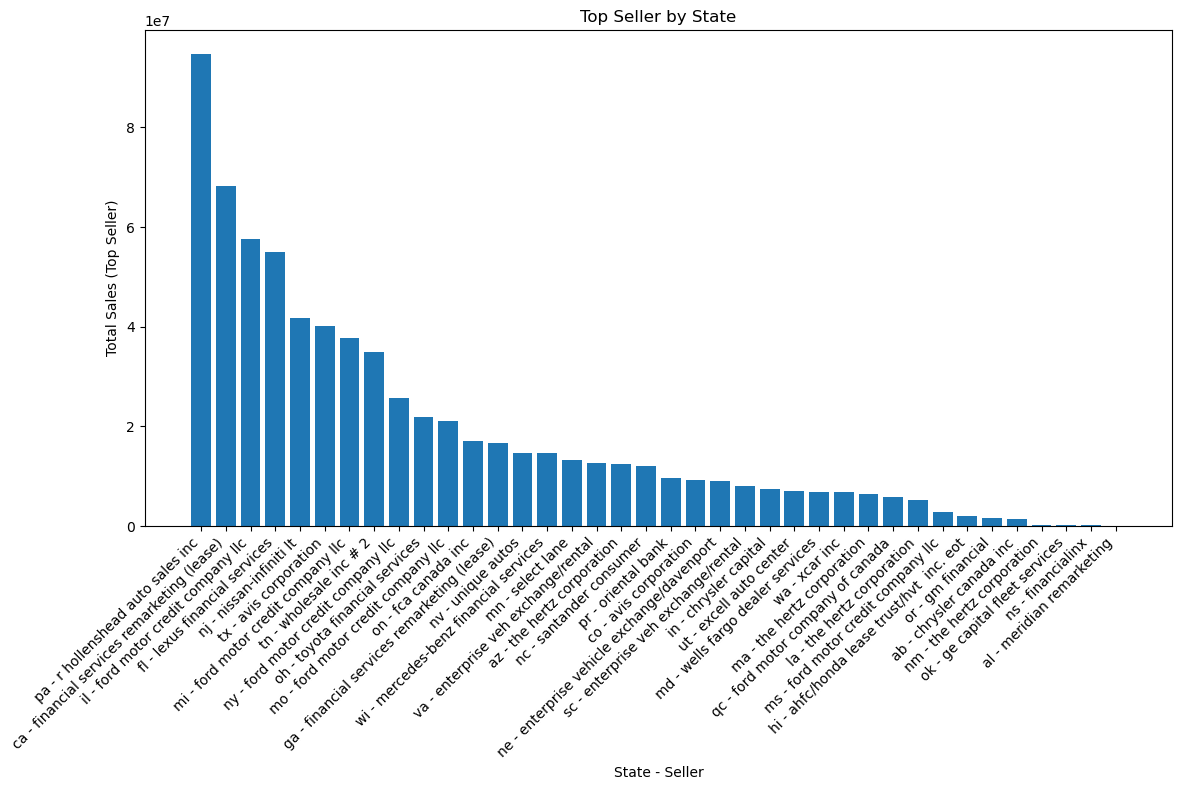

In [438]:
top_sellers_by_state['state_seller'] = top_sellers_by_state['state'] + ' - ' + top_sellers_by_state['seller']
plt.figure(figsize=(12, 8))
plt.bar(top_sellers_by_state['state_seller'], top_sellers_by_state['sellingprice'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('State - Seller')
plt.ylabel('Total Sales (Top Seller)')
plt.title('Top Seller by State')
plt.tight_layout()
plt.show()

# Top 10 Sellers by Volume

In [447]:
top_sellers = df['seller'].value_counts().head(10)
top_sellers

seller
nissan-infiniti lt                19677
ford motor credit company llc     19082
the hertz corporation             18248
santander consumer                14965
avis corporation                  12503
nissan infiniti lt                 9954
wells fargo dealer services        8545
tdaf remarketing                   7059
enterprise veh exchange/rental     6822
hyundai motor finance              6657
Name: count, dtype: int64

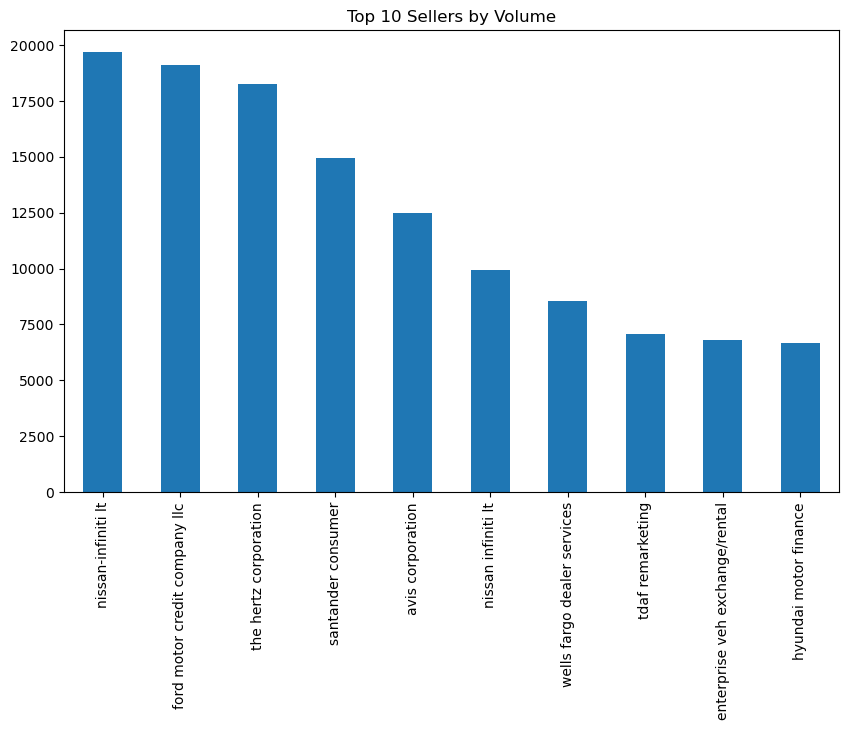

In [451]:
plt.figure(figsize=(10,6))
top_sellers.plot(kind='bar')
plt.title('Top 10 Sellers by Volume')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Impact of Seller Type on Selling Price

In [539]:
seller_type_vs_price = df['seller_type'] = df['seller'].apply(lambda x: 'Dealer' if 'inc' in x.lower() or 'motors' in x.lower() else 'Individual')
seller_type_vs_price

0             Dealer
1             Dealer
2         Individual
3         Individual
4         Individual
             ...    
558832    Individual
558833    Individual
558834    Individual
558835    Individual
558836    Individual
Name: seller, Length: 533673, dtype: object

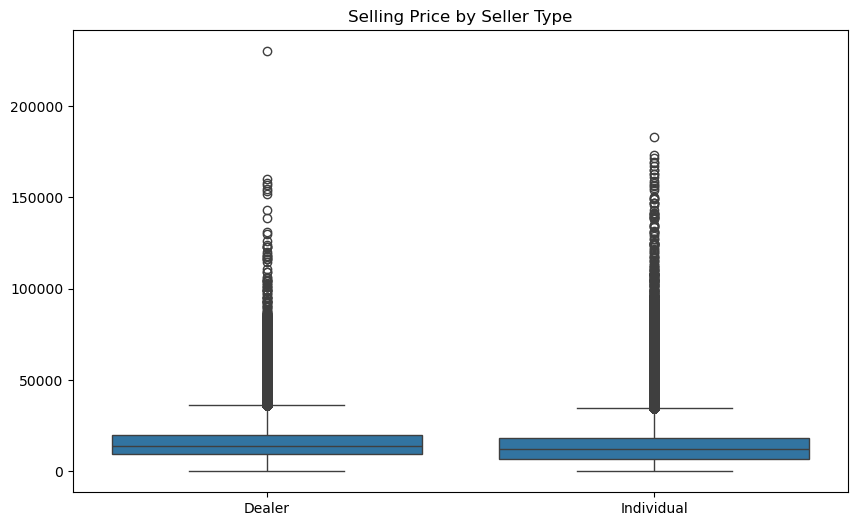

In [459]:
plt.figure(figsize=(10,6))
sns.boxplot(x='seller_type', y='sellingprice', data=df)
plt.title('Selling Price by Seller Type')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Analysis of Repeat Sellers

In [461]:
repeat_sellers = df['seller'].value_counts()
repeat_sellers = repeat_sellers[repeat_sellers > 1].index
repeat_sellers

Index(['nissan-infiniti lt', 'ford motor credit company llc',
       'the hertz corporation', 'santander consumer', 'avis corporation',
       'nissan infiniti lt', 'wells fargo dealer services', 'tdaf remarketing',
       'enterprise veh exchange/rental', 'hyundai motor finance',
       ...
       'greater chicago finance company',
       'enterprise vehicle exchange/lombard', 's&d auto sales',
       'villa auto sales', 'autoexpertz', 'belmont auto collection',
       'show me auto mall inc', 'puerto rican cars inc',
       'tdaf remarketing/majestic auto inc', 'm & i imports inc'],
      dtype='object', name='seller', length=8343)

In [463]:
avg_price_repeat_sellers = df[df['seller'].isin(repeat_sellers)].groupby('seller')['sellingprice'].mean().sort_values(ascending=False)
avg_price_repeat_sellers

seller
financial services remarketing (bmw int)           153125.000000
carbiz solutions  inc.                             133000.000000
porsche fin svcs dba bentley financial services    114142.857143
flycatcher llc                                      95500.000000
park place motorcars                                87500.000000
                                                       ...      
gordie boucher of west bend inc                       312.500000
boucher ventures inc                                  300.000000
morehead auto sales inc                               287.500000
doug smith autoplex inc.                              275.000000
antwerpen hyundai                                     250.000000
Name: sellingprice, Length: 8343, dtype: float64

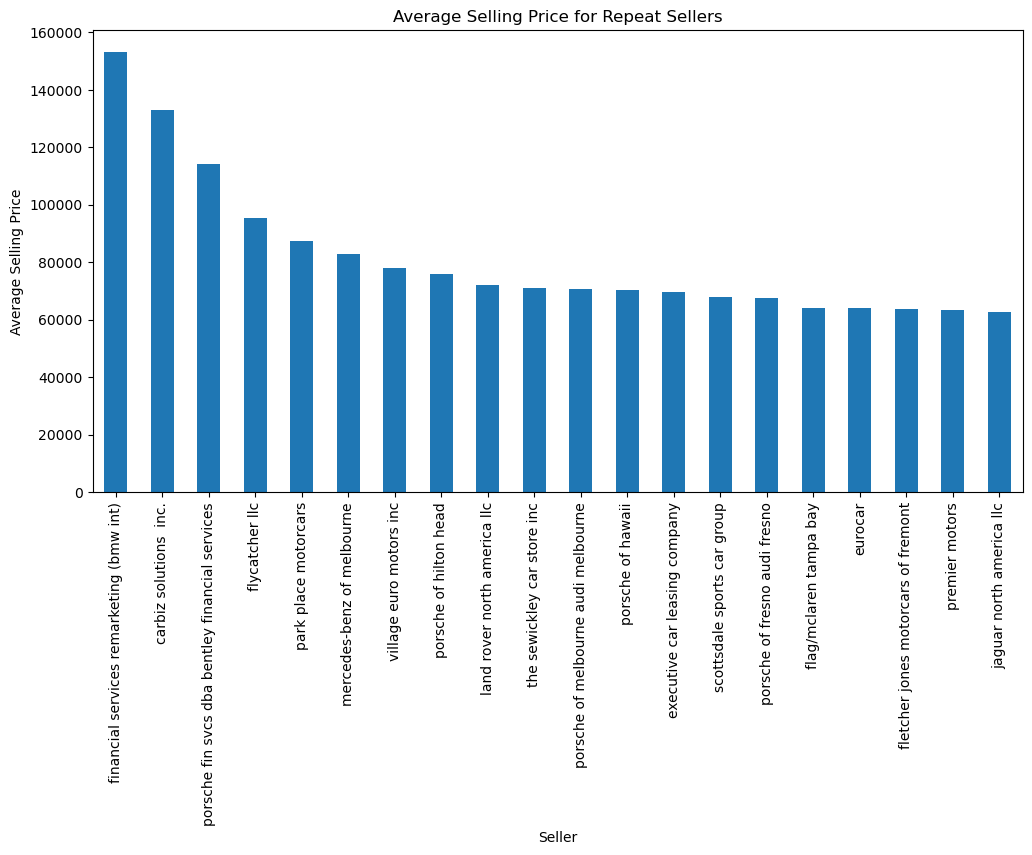

In [229]:
plt.figure(figsize=(12,6))
avg_price_repeat_sellers.head(20).plot(kind='bar')
plt.title('Average Selling Price for Repeat Sellers')
plt.xlabel('Seller')
plt.ylabel('Average Selling Price')
plt.show()

# Correlation Matrix

In [466]:
numerical_columns = ['year', 'car_condition', 'odometer', 'mmr', 'sellingprice']
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

year  car_condition  odometer       mmr  sellingprice
year           1.000000       0.332956 -0.775187  0.589003      0.579115
car_condition  0.332956       1.000000 -0.313025  0.275314      0.316480
odometer      -0.775187      -0.313025  1.000000 -0.581737     -0.576545
mmr            0.589003       0.275314 -0.581737  1.000000      0.983670
sellingprice   0.579115       0.316480 -0.576545  0.983670      1.000000

In [468]:
numerical_columns_2 = ['car_condition', 'odometer', 'mmr', 'sellingprice']
correlation_matrix_2 = df[numerical_columns_2].corr()
correlation_matrix_2

car_condition  odometer       mmr  sellingprice
car_condition       1.000000 -0.313025  0.275314      0.316480
odometer           -0.313025  1.000000 -0.581737     -0.576545
mmr                 0.275314 -0.581737  1.000000      0.983670
sellingprice        0.316480 -0.576545  0.983670      1.000000

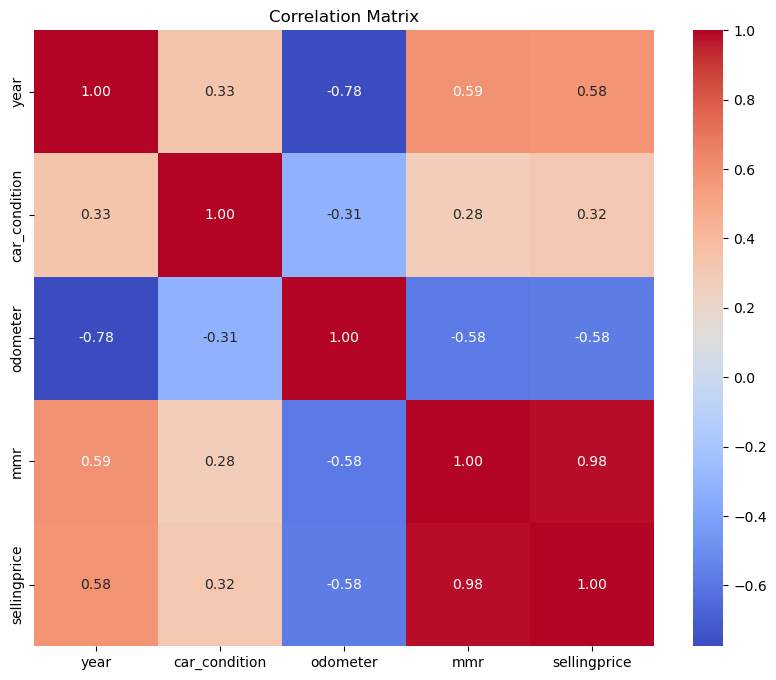

In [470]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

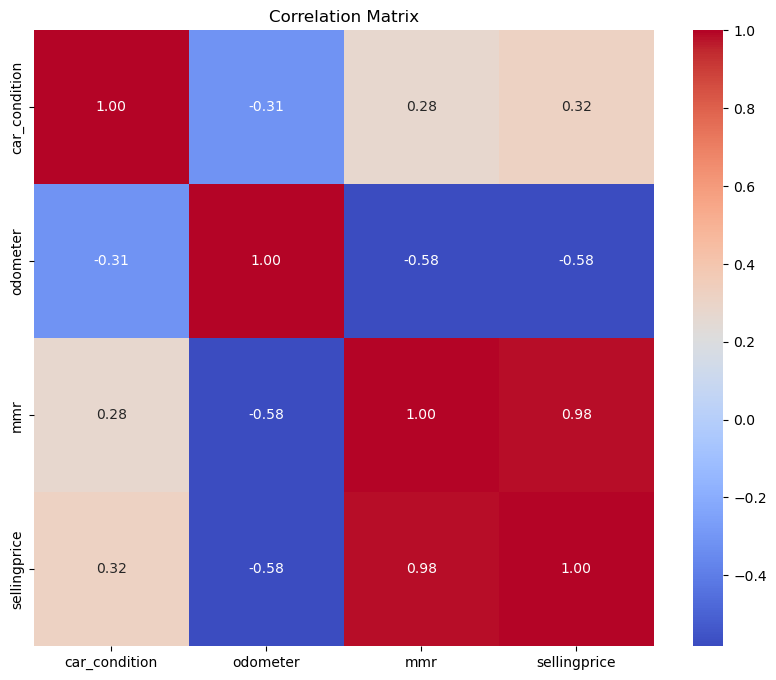

In [472]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Most Common Brand and Color Combinations

In [507]:
color_brand_combinations = df.groupby(['color', 'make']).size().reset_index(name='count')
color_brand_combinations = color_brand_combinations.sort_values(by='count', ascending=False)
color_brand_combinations = color_brand_combinations.head(20)
color_brand_combinations

color       make  count
662   white       Ford  21669
54    black       Ford  15237
656   white  Chevrolet  13088
75    black     Nissan  11215
315    gray       Ford  10737
578  silver  Chevrolet  10605
584  silver       Ford  10405
682   white     Nissan  10362
744       —       Ford   9967
48    black  Chevrolet   9810
535     red       Ford   9195
334    gray     Nissan   8635
604  silver     Nissan   7683
616  silver     Toyota   7489
309    gray  Chevrolet   7419
104    blue       Ford   7214
347    gray     Toyota   6862
695   white     Toyota   6491
44    black        BMW   6275
88    black     Toyota   5880

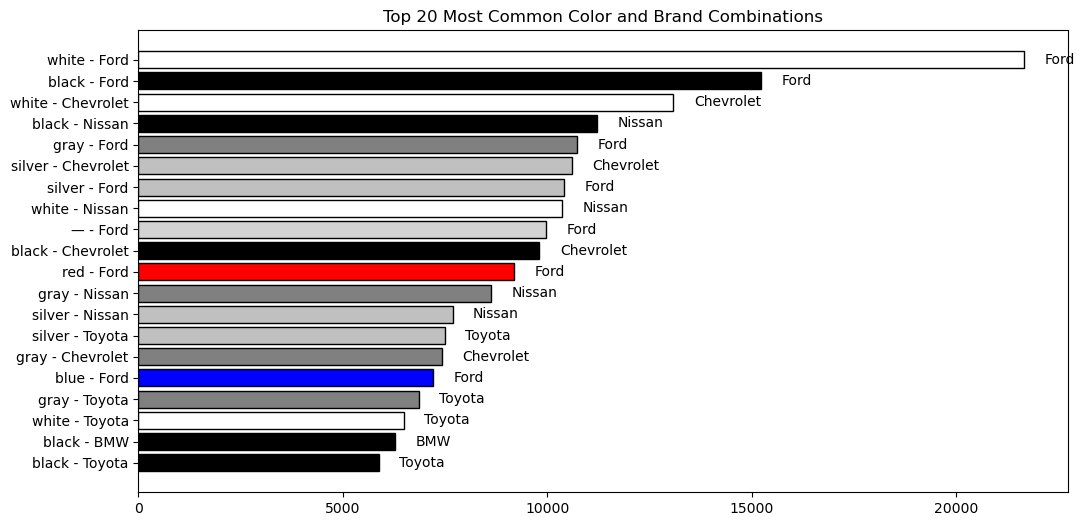

In [509]:
color_map = {
    'black': 'black',
    'white': 'white',
    'gray': 'gray',
    'silver': 'silver',
    'blue': 'blue',
    'red': 'red',
    '—': 'lightgray',  
}
bar_colors = color_brand_combinations['color'].map(color_map)
plt.figure(figsize=(12, 6))
bars = plt.barh(color_brand_combinations['color'] + ' - ' + color_brand_combinations['make'], 
                color_brand_combinations['count'], 
                color=bar_colors,
                edgecolor='black')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 20 Most Common Color and Brand Combinations')
plt.gca().invert_yaxis()
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 500,  
             bar.get_y() + bar.get_height() / 2, 
             color_make_combinations['make'].iloc[i], 
             va='center')
plt.show()

# Most Common Car Brand and Model

In [511]:
brand_model_combinations = df.groupby(['make', 'model']).size().reset_index(name='count')
brand_model_combinations = brand_model_combinations.sort_values(by='count', ascending=False)
brand_model_combinations = brand_model_combinations.head(20)
brand_model_combinations

make           model  count
589     Nissan          Altima  19159
251       Ford           F-150  14165
265       Ford          Fusion  12835
710     Toyota           Camry  12328
242       Ford          Escape  11714
261       Ford           Focus  10231
315      Honda          Accord   8847
45         BMW        3 Series   8019
205      Dodge   Grand Caravan   7840
144  Chevrolet          Impala   7775
248       Ford        Explorer   7541
361   Infiniti         G Sedan   7412
714     Toyota         Corolla   7228
320      Honda           Civic   7207
147  Chevrolet          Malibu   6898
345    Hyundai          Sonata   6816
597     Nissan          Maxima   6480
139  Chevrolet           Cruze   6314
335    Hyundai         Elantra   6193
157  Chevrolet  Silverado 1500   6161

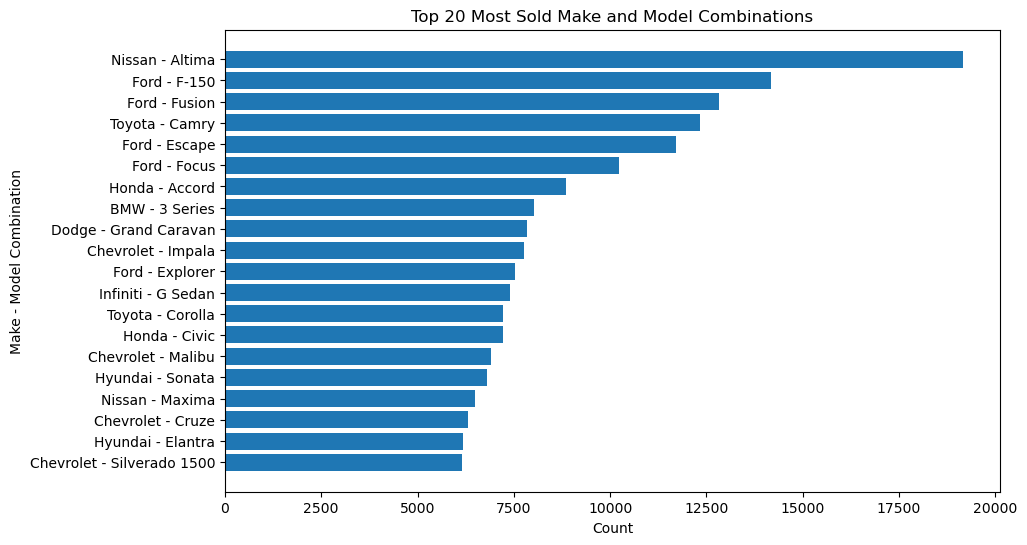

In [513]:
plt.figure(figsize=(10, 6))
plt.barh(make_model_combinations['make'] + ' - ' + make_model_combinations['model'], make_model_combinations['count'])
plt.xlabel('Count')
plt.ylabel('Make - Model Combination')
plt.title('Top 20 Most Sold Make and Model Combinations')
plt.gca().invert_yaxis()
plt.show()

# Most Car Brand and Model Combo by Sales

In [517]:
brand_model_sales = df.groupby(['make', 'model'])['sellingprice'].sum().reset_index()
brand_model_sales = brand_model_sales.sort_values(by='sellingprice', ascending=False)
brand_model_sales = brand_model_sales.head(20)
brand_model_sales

make             model  sellingprice
251           Ford             F-150   269536509.0
589         Nissan            Altima   219994458.0
242           Ford            Escape   164809012.0
265           Ford            Fusion   158926120.0
361       Infiniti           G Sedan   147811406.0
248           Ford          Explorer   139211044.0
710         Toyota             Camry   139125583.0
45             BMW          3 Series   136265145.0
241           Ford              Edge   110094907.0
157      Chevrolet    Silverado 1500   105365746.0
261           Ford             Focus    95982651.0
536  Mercedes-Benz           C-Class    92879732.0
205          Dodge     Grand Caravan    90122993.0
49             BMW          5 Series    87118250.0
315          Honda            Accord    86933600.0
194       Chrysler  Town and Country    86501227.0
597         Nissan            Maxima    85678849.0
541  Mercedes-Benz           E-Class    80339685.0
410           Jeep          Wrangler    80314108.0
606         Nissan             Rogue    76810260.0

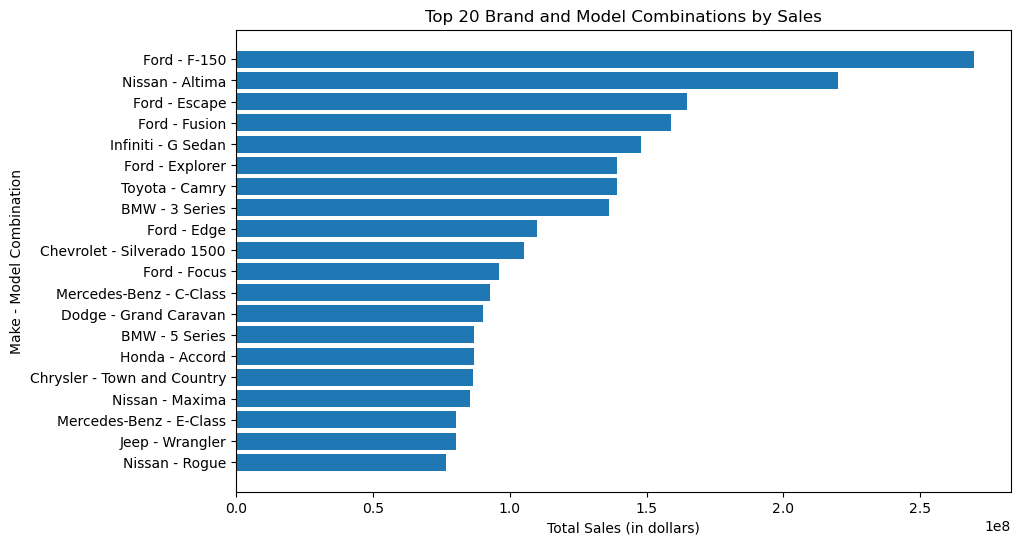

In [519]:
plt.figure(figsize=(10, 6))
plt.barh(brand_model_sales['make'] + ' - ' + brand_model_sales['model'], brand_model_sales['sellingprice'])
plt.xlabel('Total Sales (in dollars)')
plt.ylabel('Make - Model Combination')
plt.title('Top 20 Brand and Model Combinations by Sales')
plt.gca().invert_yaxis()
plt.show()

# Most Common Combinations of Brand, Model, and Year

In [270]:
common_combinations = df.groupby(['make', 'model', 'year']).size().reset_index(name='counts')
common_combinations = common_combinations.sort_values(by='counts', ascending=False).head(20)
common_combinations

make             model  year  counts
3692     Nissan            Altima  2012    8341
3693     Nissan            Altima  2013    5156
1710       Ford            Fusion  2012    4065
1519       Ford            Escape  2013    4039
1711       Ford            Fusion  2013    3624
2205    Hyundai           Elantra  2013    3341
1692       Ford             Focus  2013    3292
2030      Honda            Accord  2012    3184
4441     Toyota             Camry  2014    3055
2342   Infiniti           G Sedan  2013    2978
4439     Toyota             Camry  2012    2974
1712       Ford            Fusion  2014    2948
1245   Chrysler  Town and Country  2014    2818
2080      Honda             Civic  2012    2717
1518       Ford            Escape  2012    2690
877   Chevrolet             Cruze  2014    2665
2341   Infiniti           G Sedan  2012    2660
1335      Dodge     Grand Caravan  2014    2574
1693       Ford             Focus  2014    2569
1587       Ford          Explorer  2013    2546

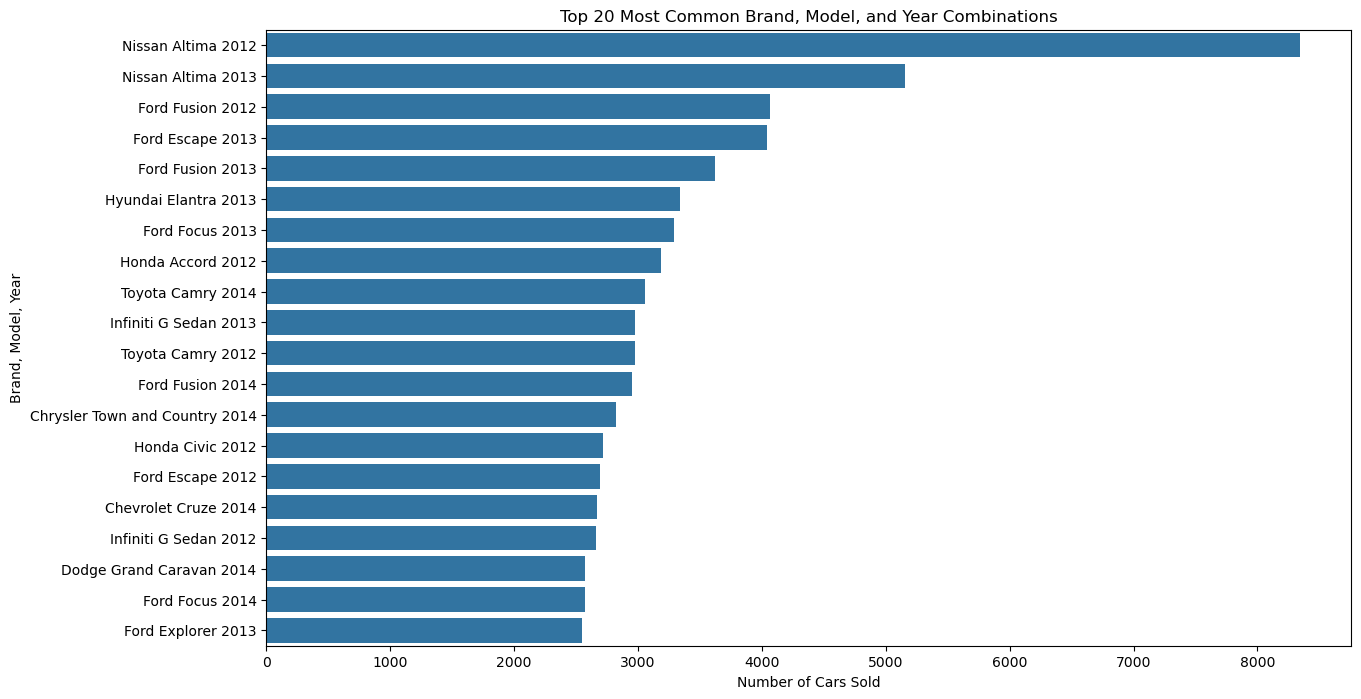

In [524]:
plt.figure(figsize=(14,8))
sns.barplot(x='counts', y=common_combinations['make'] + ' ' + common_combinations['model'] + ' ' + common_combinations['year'].astype(str), data=common_combinations)
plt.title('Top 20 Most Common Brand, Model, and Year Combinations')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Brand, Model, Year')
plt.show()

# Most common Brand, Model and Color

In [527]:
brand_model_color_combinations = df.groupby(['make', 'model', 'color']).size().reset_index(name='count')
brand_model_color_combinations = brand_model_color_combinations.sort_values(by='count', ascending=False)
brand_model_color_combinations.head(20)

make     model   color  count
2355       Ford     F-150   white   4438
5563     Nissan    Altima   black   4190
5578     Nissan    Altima   white   4001
5569     Nissan    Altima    gray   2954
5576     Nissan    Altima  silver   2528
2341       Ford     F-150   black   2454
336         BMW  3 Series   black   2425
6750     Toyota     Camry    gray   2411
6756     Toyota     Camry  silver   2394
3437   Infiniti   G Sedan    gray   2201
2521       Ford    Fusion   white   2169
3432   Infiniti   G Sedan   black   2105
2507       Ford    Fusion   black   2080
6744     Toyota     Camry   black   2066
2218       Ford    Escape   black   2063
2949      Honda    Accord   black   1975
2955      Honda    Accord    gray   1966
2522       Ford    Fusion       —   1955
2513       Ford    Fusion    gray   1841
1260  Chevrolet    Impala  silver   1828

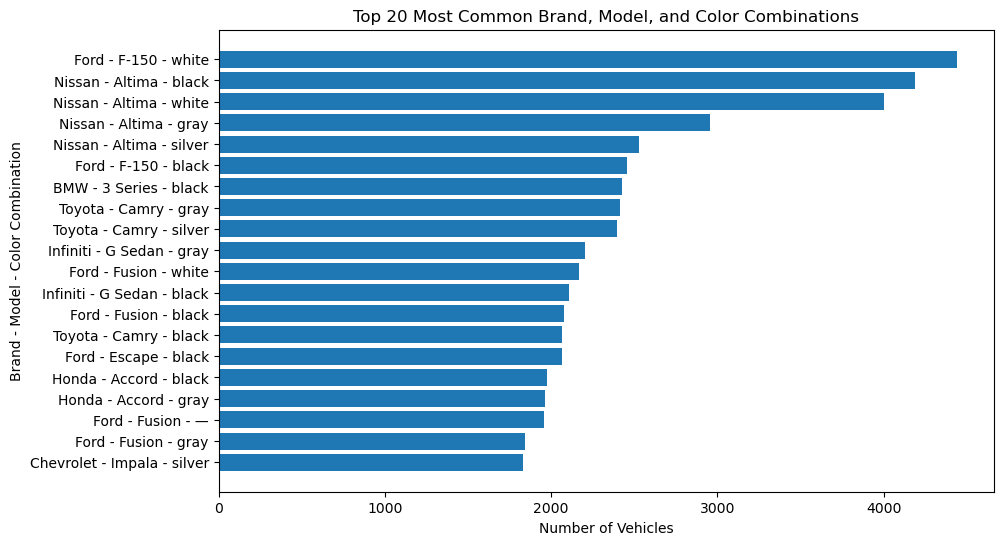

In [529]:
top_20_brand_model_color_combinations = brand_model_color_combinations.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_20_brand_model_color_combinations['make'] + ' - ' + top_20_brand_model_color_combinations['model'] + ' - ' + top_20_brand_model_color_combinations['color'], 
         top_20_brand_model_color_combinations['count'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Brand - Model - Color Combination')
plt.title('Top 20 Most Common Brand, Model, and Color Combinations')
plt.gca().invert_yaxis()
plt.show()

# Analysis of High Mileage Vehicles
### Define high mileage vehicles as those above a certain threshold. In this case, we'll use 100,000 miles. This can be change as required

In [288]:
high_mileage_threshold = 100000
high_mileage_vehicles = df[df['odometer'] > high_mileage_threshold]
high_mileage_vehicles

year       make            model         trim           body  \
275     2013    Hyundai    Elantra Coupe           GS  elantra coupe   
585     2013     Toyota           Tundra       Tundra    crewmax cab   
1007    2012       Ford           Fiesta            S          sedan   
1038    2012  Chevrolet    Express Cargo         1500            van   
1058    2012  Chevrolet   Silverado 1500           LT       crew cab   
...      ...        ...              ...          ...            ...   
558785  2004       Ford       Expedition          XLT            suv   
558791  2012       Ford  Transit Connect    Wagon XLT        minivan   
558794  2007   Chrysler       PT Cruiser         Base          wagon   
558795  2006   Cadillac              DTS  Performance          sedan   
558809  2008      Honda          Odyssey         EX-L        minivan   

       transmission                vin state  car_condition  odometer   color  \
275       automatic  kmhdh6ae8du017422    ca            1.0  999999.0    blue   
585       automatic  5tfem5f11dx062107    ca           42.0  102345.0       —   
1007      automatic  3fadp4aj1cm132316    ca            3.0  149962.0   white   
1038      automatic  1gcsgafx9c1156776    ca           28.0  160525.0   white   
1058      automatic  3gcukse29cg269406    ca           41.0  123543.0   white   
...             ...                ...   ...            ...       ...     ...   
558785    automatic  1fmru15w64la02138    fl           35.0  108286.0   white   
558791    automatic  nm0ks9bnxct078155    mn           27.0  262065.0  silver   
558794    automatic  3a4fy48b57t550642    nc           19.0  100881.0  silver   
558795    automatic  1g6kd57916u116696    nj           24.0  108790.0   black   
558809    automatic  5fnrl38738b099718    fl           41.0  101773.0  silver   

       interior                            seller      mmr  sellingprice  \
275        gray             hyundai motor finance   8025.0        2500.0   
585        gray               wheels exchange llc  18850.0       18500.0   
1007       gray  enterprise fm exchange/tra/lease   3650.0        3200.0   
1038       gray                    lease plan usa   8800.0        7800.0   
1058      black  farm credit leasing exchange inc  23500.0       21000.0   
...         ...                               ...      ...           ...   
558785     gray    prestige leasing and sales inc   4325.0        5100.0   
558791     gray              saxon fleet services  10100.0        3000.0   
558794     gray            national fleet leasing   2000.0        3000.0   
558795    brown                santander consumer   4875.0        4200.0   
558809     gray     the auto group collection inc   9275.0       10000.0   

         saledate vehicle_type  month seller_type  
275    2015-01-27      Low-End      1  Individual  
585    2014-12-17     High-End     12  Individual  
1007   2014-12-16      Low-End     12  Individual  
1038   2014-12-16      Low-End     12  Individual  
1058   2015-01-28     High-End      1      Dealer  
...           ...          ...    ...         ...  
558785 2015-06-24      Low-End      6      Dealer  
558791 2015-07-07      Low-End      7  Individual  
558794 2015-07-06      Low-End      7  Individual  
558795 2015-07-02      Low-End      7  Individual  
558809 2015-07-07      Low-End      7      Dealer  

[122921 rows x 19 columns]

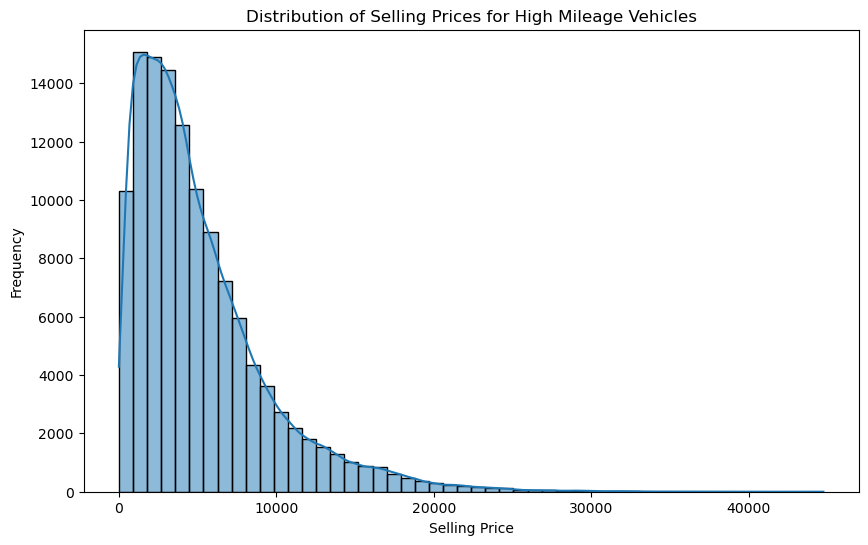

In [290]:
plt.figure(figsize=(10,6))
sns.histplot(high_mileage_vehicles['sellingprice'], bins=50, kde=True)
plt.title('Distribution of Selling Prices for High Mileage Vehicles')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()